<h3> Drought Data Notebook</h3> 

<p><b>Name:</b> Rachel Stevenson </p>
<p><b>Date:</b> September 15th 2019 </p>
<p><b>Email:</b> rsteve388@gmail.com </p> 

<p><b>Goal:</b> The goal of this notebook is to showcase the various level of droughts for each month. 
    In addition, an interactive web map will be created from this data that 
    allows users to see drought levels by month.</p>
    
<p>The following notebook shows the data for the 2018 - 2019 year. Starting in August of 2018. </p>
    <p><b> Sources </p></b>
    <p>The drought data consists of all shp files from <a href="https://droughtmonitor.unl.edu/"> Drought Monitor.</a>
    The data for the US States are from the <a href="https://www.census.gov/programs-surveys/geography/geographies.html"> U.S Census.</a></p>
    The data for this notebook can be found in the sub directory titled: Drought_Data_18_19</p>
<p> Tutorial for working with states <a href="https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d"> data</a>
</p>
<p><b>Additional Information:</b></p>
    <p>Drought Levels:</p> 
    <ol>
    <li>D0 = Abnormally Dry (Headed Into a Drought or Coming out of a Drought but not yet back to normal)</li>
    <li> D1 = Moderate Drought (Streams and rivers low, strain on crops)</li>
    <li> D2 = Severe Drought (crop losses likely,Water Restrictions Implemented)</li>
    <li>D3 = Extreame Drought (Widespread cross losses, water loss and wide spread water shortages)</li>
   <li> D4 = Exceptional Drought (shortages of water in wells, resviors and streams leading to water emergencies)</li>
    </ol>

<h3> Part 1: Data Wranging</h3> 

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
from shapely.geometry import Point, Polygon
from shapely.geometry import mapping
import shapely.speedups
import timeit

In [3]:
# Import data into this notebook 
# use relative paths for importing data 
Aug_Drought_18 = gpd.read_file("./Drought_Data_18_19/August_18_shp/USDM_20180814.shp")
Sep_Drought = gpd.read_file("./Drought_Data_18_19/Sep_18_shp/USDM_20180911.shp")
Oct_Drought = gpd.read_file("./Drought_Data_18_19/Oct_18_shp/USDM_20181016.shp")
Nov_Drought = gpd.read_file("./Drought_Data_18_19/Nov_18_shp/USDM_20181113.shp")
Dec_Drought = gpd.read_file("./Drought_Data_18_19/Dec_18_shp/USDM_20181211.shp")
Jan_Drought = gpd.read_file("./Drought_Data_18_19/Jan_19_shp/USDM_20190115.shp")
Feb_Drought = gpd.read_file("./Drought_Data_18_19/Feb_19_shp/USDM_20190212.shp")
Mar_Drought = gpd.read_file("./Drought_Data_18_19/Mar_19_Shp/USDM_20190312.shp")
Apr_Drought = gpd.read_file("./Drought_Data_18_19/April_19_Shp/USDM_20190416.shp")
May_Drought = gpd.read_file("./Drought_Data_18_19/May_Shp/May_19_Shp/USDM_20190514.shp")
Jun_Drought = gpd.read_file("./Drought_Data_18_19/June_Shp/June_19_Shp/USDM_20190618.shp")
Jul_Drought = gpd.read_file("./Drought_Data_18_19/July_shp/July _19_shp/USDM_20190716.shp")
Aug_Drought_19 = gpd.read_file("./Drought_Data_18_19/August_Shp_impacts/August_19_Shp/USDM_20190813.shp")
States = gpd.read_file("./Drought_Data_18_19/states_21basic/states.shp")

In [4]:
# What does this data look like? 
# What shape is the data in? 
# all 11 of the layers will look similar 
# to the one we are calling the head() for. 
Aug_Drought_18.head()

OBJECTID  DM    Shape_Leng    Shape_Area  \
0         1   0  7.775261e+07  1.749966e+12   
1         2   1  6.128741e+07  1.302066e+12   
2         3   2  3.374157e+07  9.263939e+11   
3         4   3  1.610233e+07  5.010563e+11   
4         5   4  4.029446e+06  1.325101e+11   

                                            geometry  
0  (POLYGON ((-66.52044677825819 17.8896942098266...  
1  (POLYGON ((-100.2436543227827 34.6396749810306...  
2  (POLYGON ((-104.3369661558554 30.3637455412771...  
3  (POLYGON ((-100.177662518576 29.20295093327289...  
4  (POLYGON ((-99.89655993325363 28.9464592104802...

In [5]:
States.head()

STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
0        Hawaii        1         15             Pacific         HI   
1    Washington        2         53             Pacific         WA   
2       Montana        3         30            Mountain         MT   
3         Maine        4         23         New England         ME   
4  North Dakota        5         38  West North Central         ND   

                                            geometry  
0  (POLYGON ((-160.0738033454681 22.0041773479577...  
1  (POLYGON ((-122.4020153103835 48.2252163723779...  
2  POLYGON ((-111.4754253002074 44.70216236909688...  
3  (POLYGON ((-69.77727626137293 44.0741483685119...  
4  POLYGON ((-98.73043728833767 45.93827137024809...

In [6]:
States.tail()

STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
46   Arkansas       47         05  West South Central         AR   
47  Louisiana       48         22  West South Central         LA   
48    Florida       49         12      South Atlantic         FL   
49   Michigan       50         26  East North Central         MI   
50     Alaska       51         02             Pacific         AK   

                                             geometry  
46  POLYGON ((-94.46169128436209 34.19676535931296...  
47  (POLYGON ((-93.70752428365972 30.2395783556275...  
48  (POLYGON ((-80.7856622716253 28.78519435427305...  
49  (POLYGON ((-88.49752727880752 48.1737953723300...  
50  (POLYGON ((-161.3337853466416 58.7332483821643...

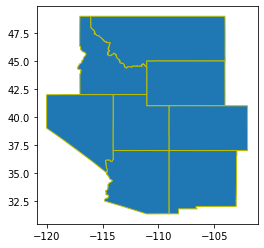

In [7]:
# I like the sub region of the data, Lets try and plot the mountain sub region and see what states come up 
States[States.SUB_REGION == "Mountain"].plot(edgecolor='y')

In [8]:
# This is great a few states extra then what we want... but lets try it 
# lets make this its own df so we can call it later 
# like when we clip it! 
Region = States[States.SUB_REGION == 'Mountain']

In [9]:
Region.head()

STATE_NAME  DRAWSEQ STATE_FIPS SUB_REGION STATE_ABBR  \
2     Montana        3         30   Mountain         MT   
6     Wyoming        7         56   Mountain         WY   
8       Idaho        9         16   Mountain         ID   
22     Nevada       23         32   Mountain         NV   
23       Utah       24         49   Mountain         UT   

                                             geometry  
2   POLYGON ((-111.4754253002074 44.70216236909688...  
6   POLYGON ((-104.0536152932953 41.69821836629923...  
8   POLYGON ((-117.026295305377 43.67903136814401,...  
22  POLYGON ((-119.1524503073572 38.41180136323852...  
23  POLYGON ((-114.0472733026026 38.1376523629832,...

In [10]:
# So this is great! There are a few extra states 
# that we don't really care for, but overall this is the focus that we want 
# Not sure I need to reproject the data for this 
# lets call the projections just so we know what they are
print(Aug_Drought_18.crs)
print(States.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4269'}


<h3> Part 2: Clipping and Plotting Data </h3>

In [11]:
# Filter out Data for August 2018 
D0 = Aug_Drought_18[Aug_Drought_18['DM']==0]
D1 = Aug_Drought_18[Aug_Drought_18['DM']==1]
D2 = Aug_Drought_18[Aug_Drought_18['DM']==2]
D3 = Aug_Drought_18[Aug_Drought_18['DM']==3]
D4 = Aug_Drought_18[Aug_Drought_18['DM']==4]

In [12]:
# Lets create a union between all of the different drought levels 
# and the region we want to work with 

Region_Poly = Region.geometry.unary_union
D0_Clip = D0[D0.geometry.intersects(Region_Poly)]
D1_Clip = D1[D1.geometry.intersects(Region_Poly)]
D2_Clip = D2[D2.geometry.intersects(Region_Poly)]
D3_Clip = D3[D3.geometry.intersects(Region_Poly)]
D4_Clip = D4[D4.geometry.intersects(Region_Poly)]

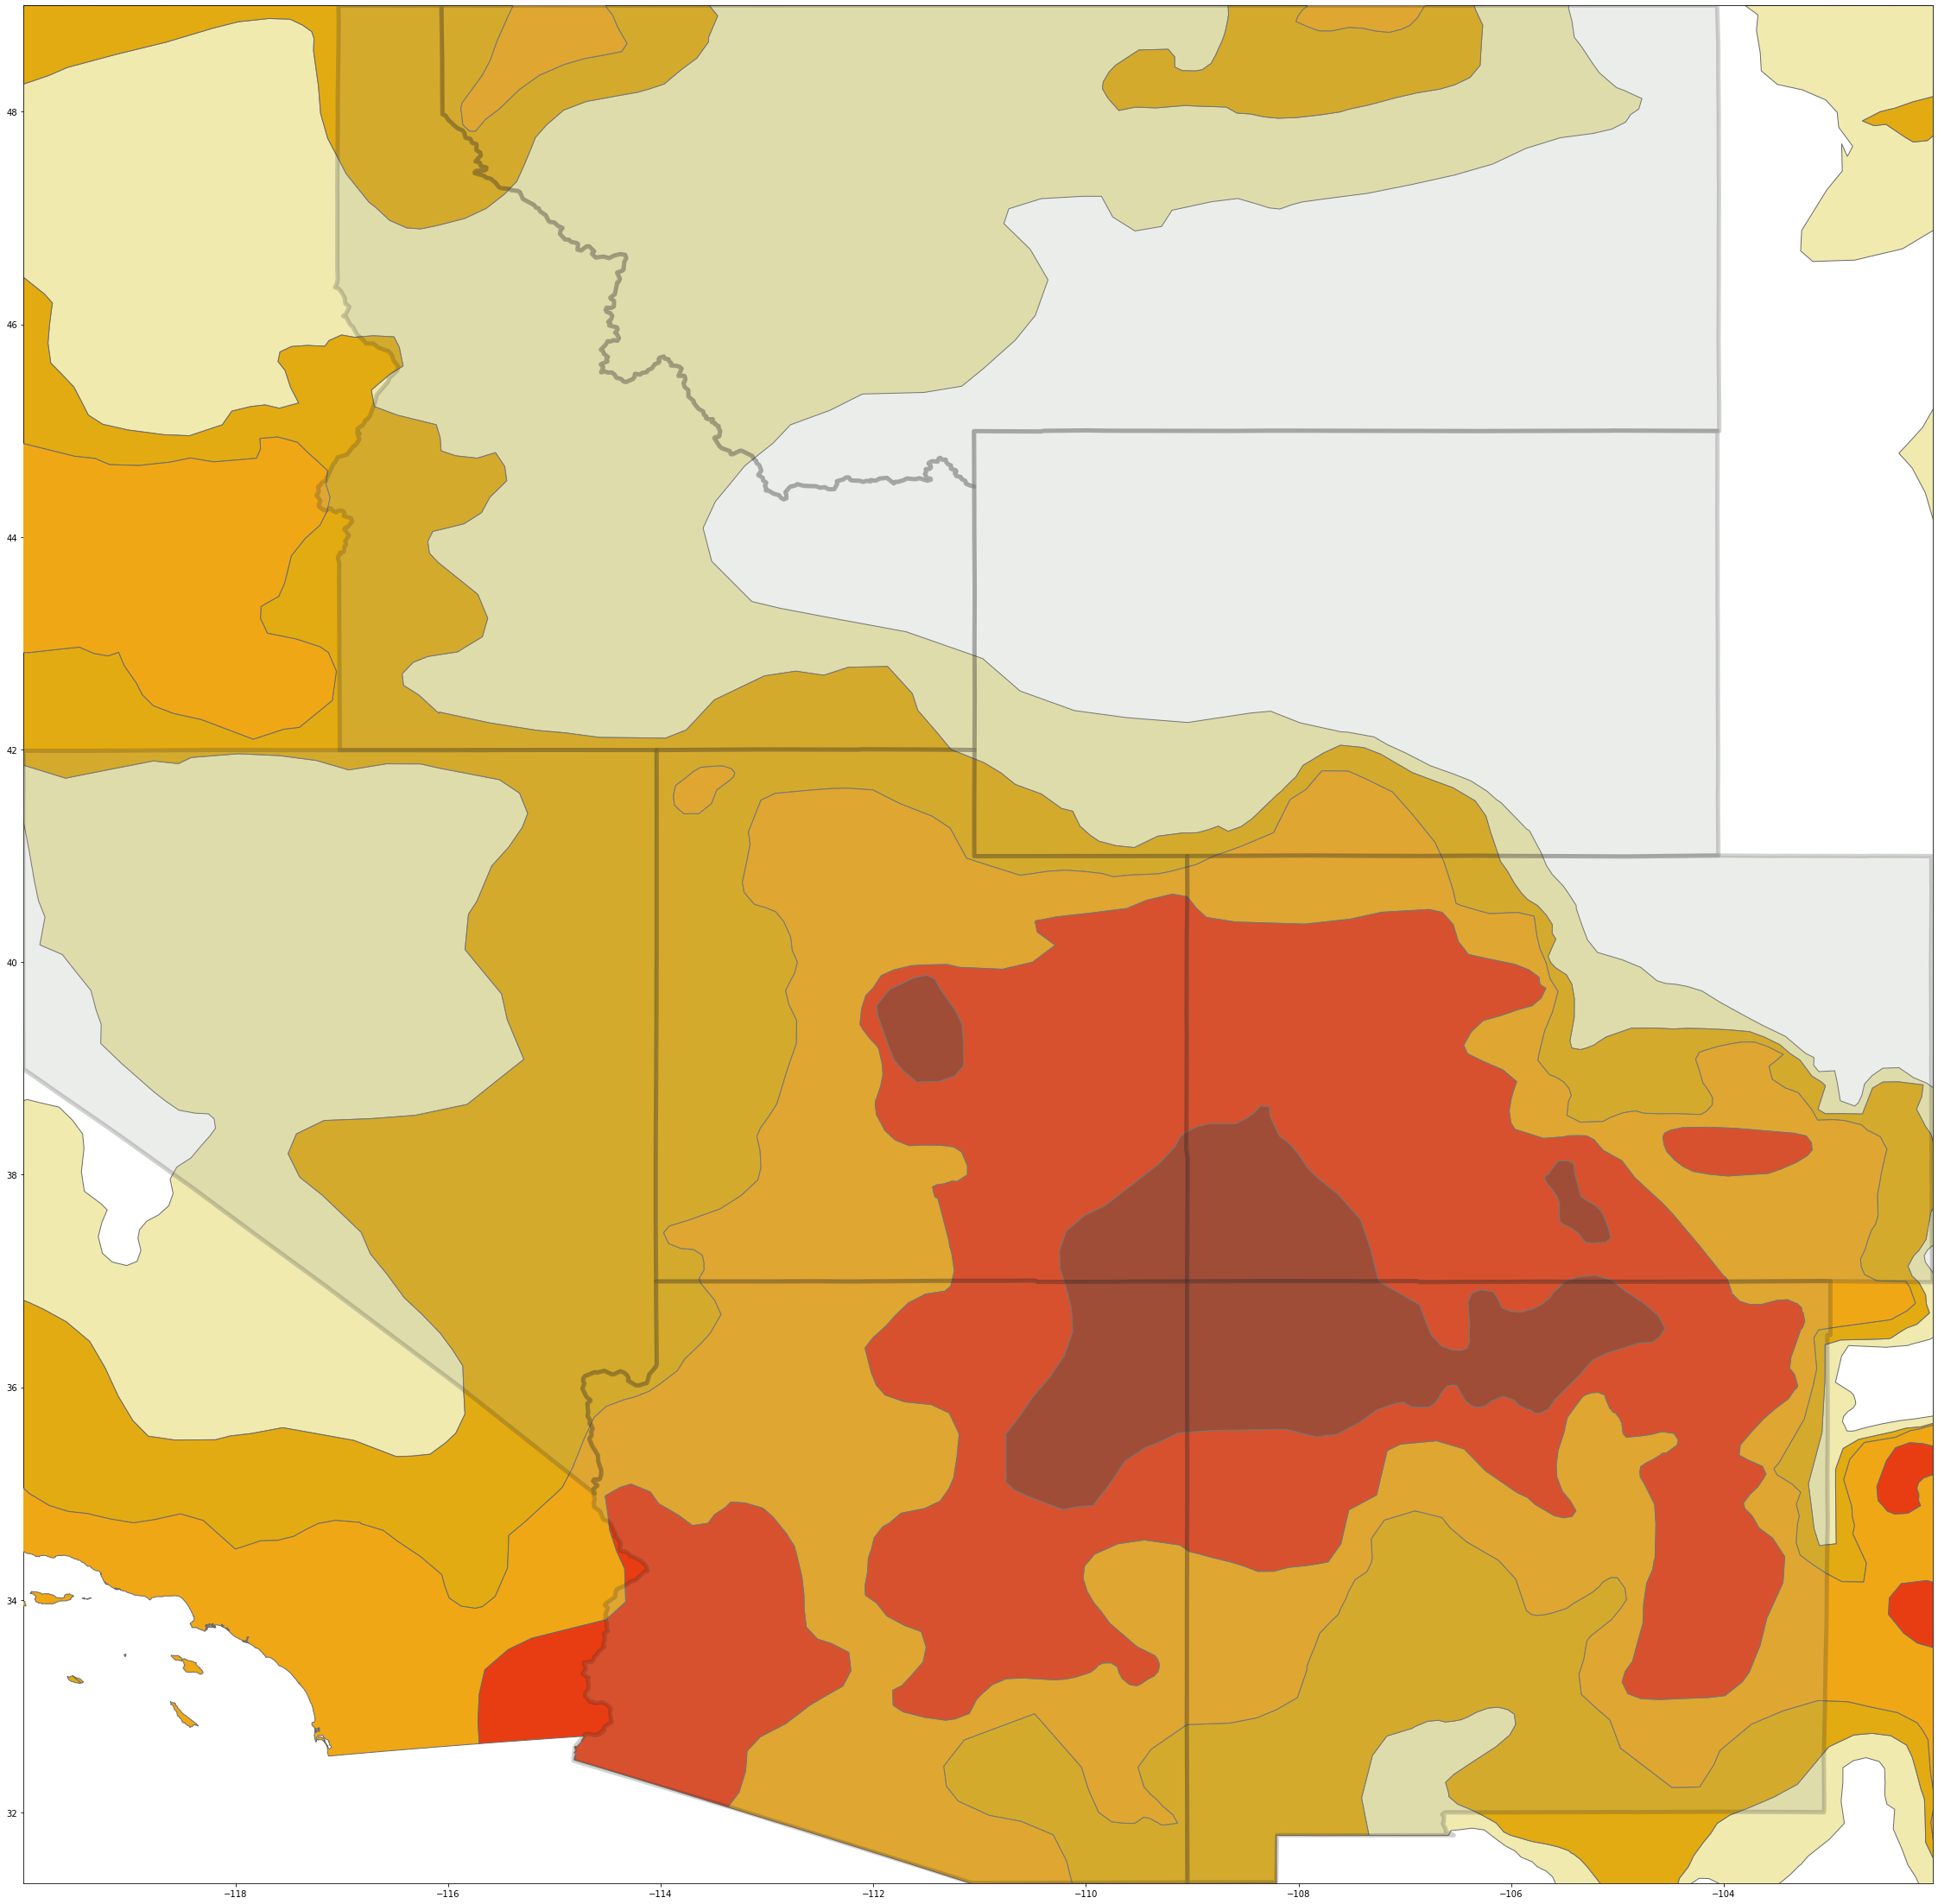

In [13]:
# Lets plot that to make sure it works 
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);
#ax.set(xlim=(-126,-65), ylim=(24,50)); # Thanks to Mark for this ax.set I don't get this at all :( 

 <h3> Results of August 2018 Drought Data</h3> 
 <p> In August of 2018 The four corner states saw some of each of the 5 drought levels. With Levels D3 and D2  and D1 being the biggest. However, the Corners did see a D4 level drought which is the most severe and did impact a decent size of the four states. </p> 
 <p> Some additional research should be done that look at droughts and population. how many people are impacted in a given area with a D3 or D4 drought? This question is for another time. Maybe with a additional understanding of just how much of Colorado is desert? </p> 

<h3> Sept, Oct and Nov 2018 Drought Data </h3> 
<p> We have the foundational peices of our data complete in Part 1,  now we need to clip and plot the data for the remainder of the months. Let's do this in 3 month increments starting with September, October and November </p> 

In [14]:
# filter for Sept Drought Lvls  
D0_Sep = Sep_Drought[Sep_Drought['DM']==0]
D1_Sep = Sep_Drought[Sep_Drought['DM']==1]
D2_Sep = Sep_Drought[Sep_Drought['DM']==2]
D3_Sep = Sep_Drought[Sep_Drought['DM']==3]
D4_Sep = Sep_Drought[Sep_Drought['DM']==4]
# Filter for Oct Drought Lvls 
D0_Oct = Oct_Drought[Oct_Drought['DM']==0]
D1_Oct = Oct_Drought[Oct_Drought['DM']==1]
D2_Oct = Oct_Drought[Oct_Drought['DM']==2]
D3_Oct = Oct_Drought[Oct_Drought['DM']==3]
D4_Oct = Oct_Drought[Oct_Drought['DM']==4]
# Filter for Nov Drought Lvls 
D0_Nov = Nov_Drought[Nov_Drought['DM']==0] 
D1_Nov = Nov_Drought[Nov_Drought['DM']==1]
D2_Nov = Nov_Drought[Nov_Drought['DM']==2]
D3_Nov = Nov_Drought[Nov_Drought['DM']==3]
D4_Nov = Nov_Drought[Nov_Drought['DM']==4]

In [15]:
# Union  and intersect these levels for each of the three months. 
# Sept Intersections with Region 
D0_Clip_Sep = D0_Sep[D0_Sep.geometry.intersects(Region_Poly)]
D1_Clip_Sep = D1_Sep[D1_Sep.geometry.intersects(Region_Poly)]
D2_Clip_Sep = D2_Sep[D2_Sep.geometry.intersects(Region_Poly)]
D3_Clip_Sep = D3_Sep[D3_Sep.geometry.intersects(Region_Poly)]
D4_Clip_Sep = D4_Sep[D4_Sep.geometry.intersects(Region_Poly)]
# October Intersects 
D0_Clip_Oct = D0_Oct[D0_Oct.geometry.intersects(Region_Poly)]
D1_Clip_Oct = D1_Oct[D1_Oct.geometry.intersects(Region_Poly)]
D2_Clip_Oct = D2_Oct[D2_Oct.geometry.intersects(Region_Poly)]
D3_Clip_Oct = D3_Oct[D3_Oct.geometry.intersects(Region_Poly)]
D4_Clip_Oct = D4_Oct[D4_Oct.geometry.intersects(Region_Poly)]
# November Intersects 
D0_Clip_Nov = D0_Nov[D0_Nov.geometry.intersects(Region_Poly)]
D1_Clip_Nov = D1_Nov[D1_Nov.geometry.intersects(Region_Poly)]
D2_Clip_Nov = D2_Nov[D2_Nov.geometry.intersects(Region_Poly)]
D3_Clip_Nov = D3_Nov[D3_Nov.geometry.intersects(Region_Poly)]
D4_Clip_Nov = D4_Nov[D4_Nov.geometry.intersects(Region_Poly)]

<h3> Plotting September 2018 Drought Data</h3> 

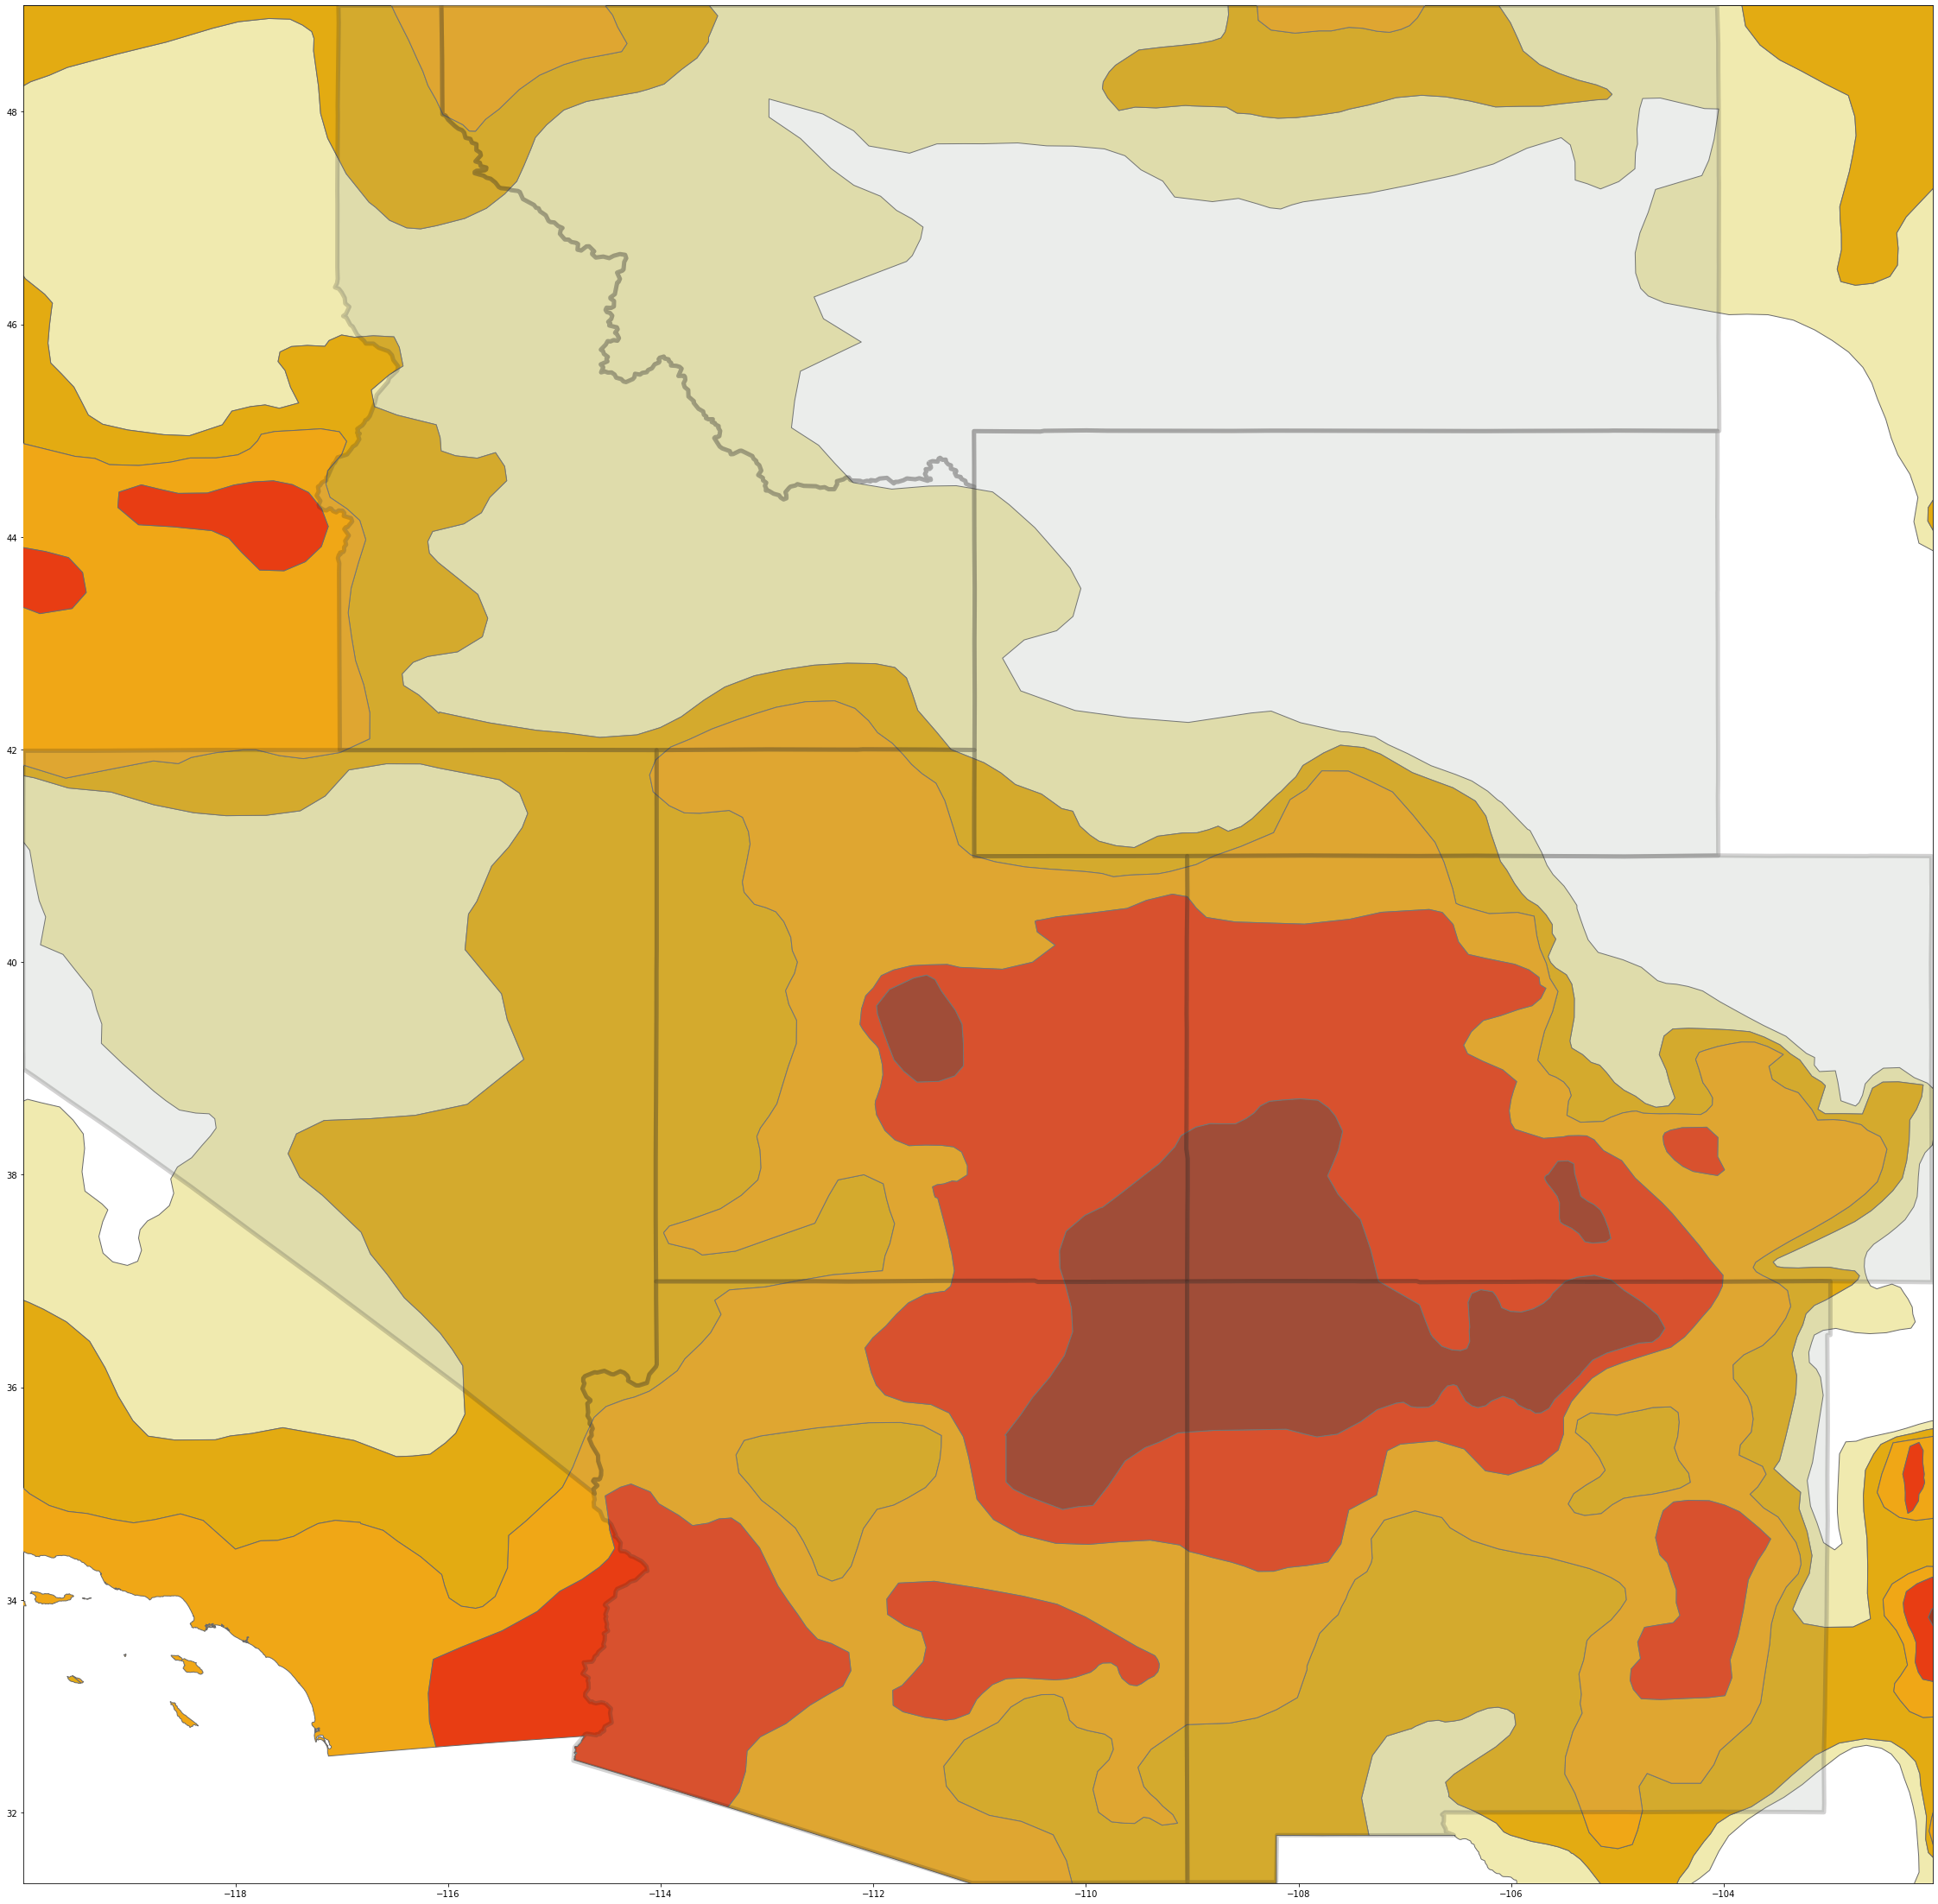

In [16]:
# Now we are ready to plot! Lets start with September 
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Sep.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Sep.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Sep.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Sep.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Sep.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results of September 2018 Drought </h3> 
<p> For the most part, at first glance September drought data looks the same as August, but there are subtle differences, D3 is  showing up in AZ more often with the addition of the south western corner and it looks like NM is seeing all four levels of drought in this month. </p> 
<p> Additional Research: How has drought increased in this region over the last 10 years? </p> 


<h3> Plotting October 2018 Drought Levels </h3> 

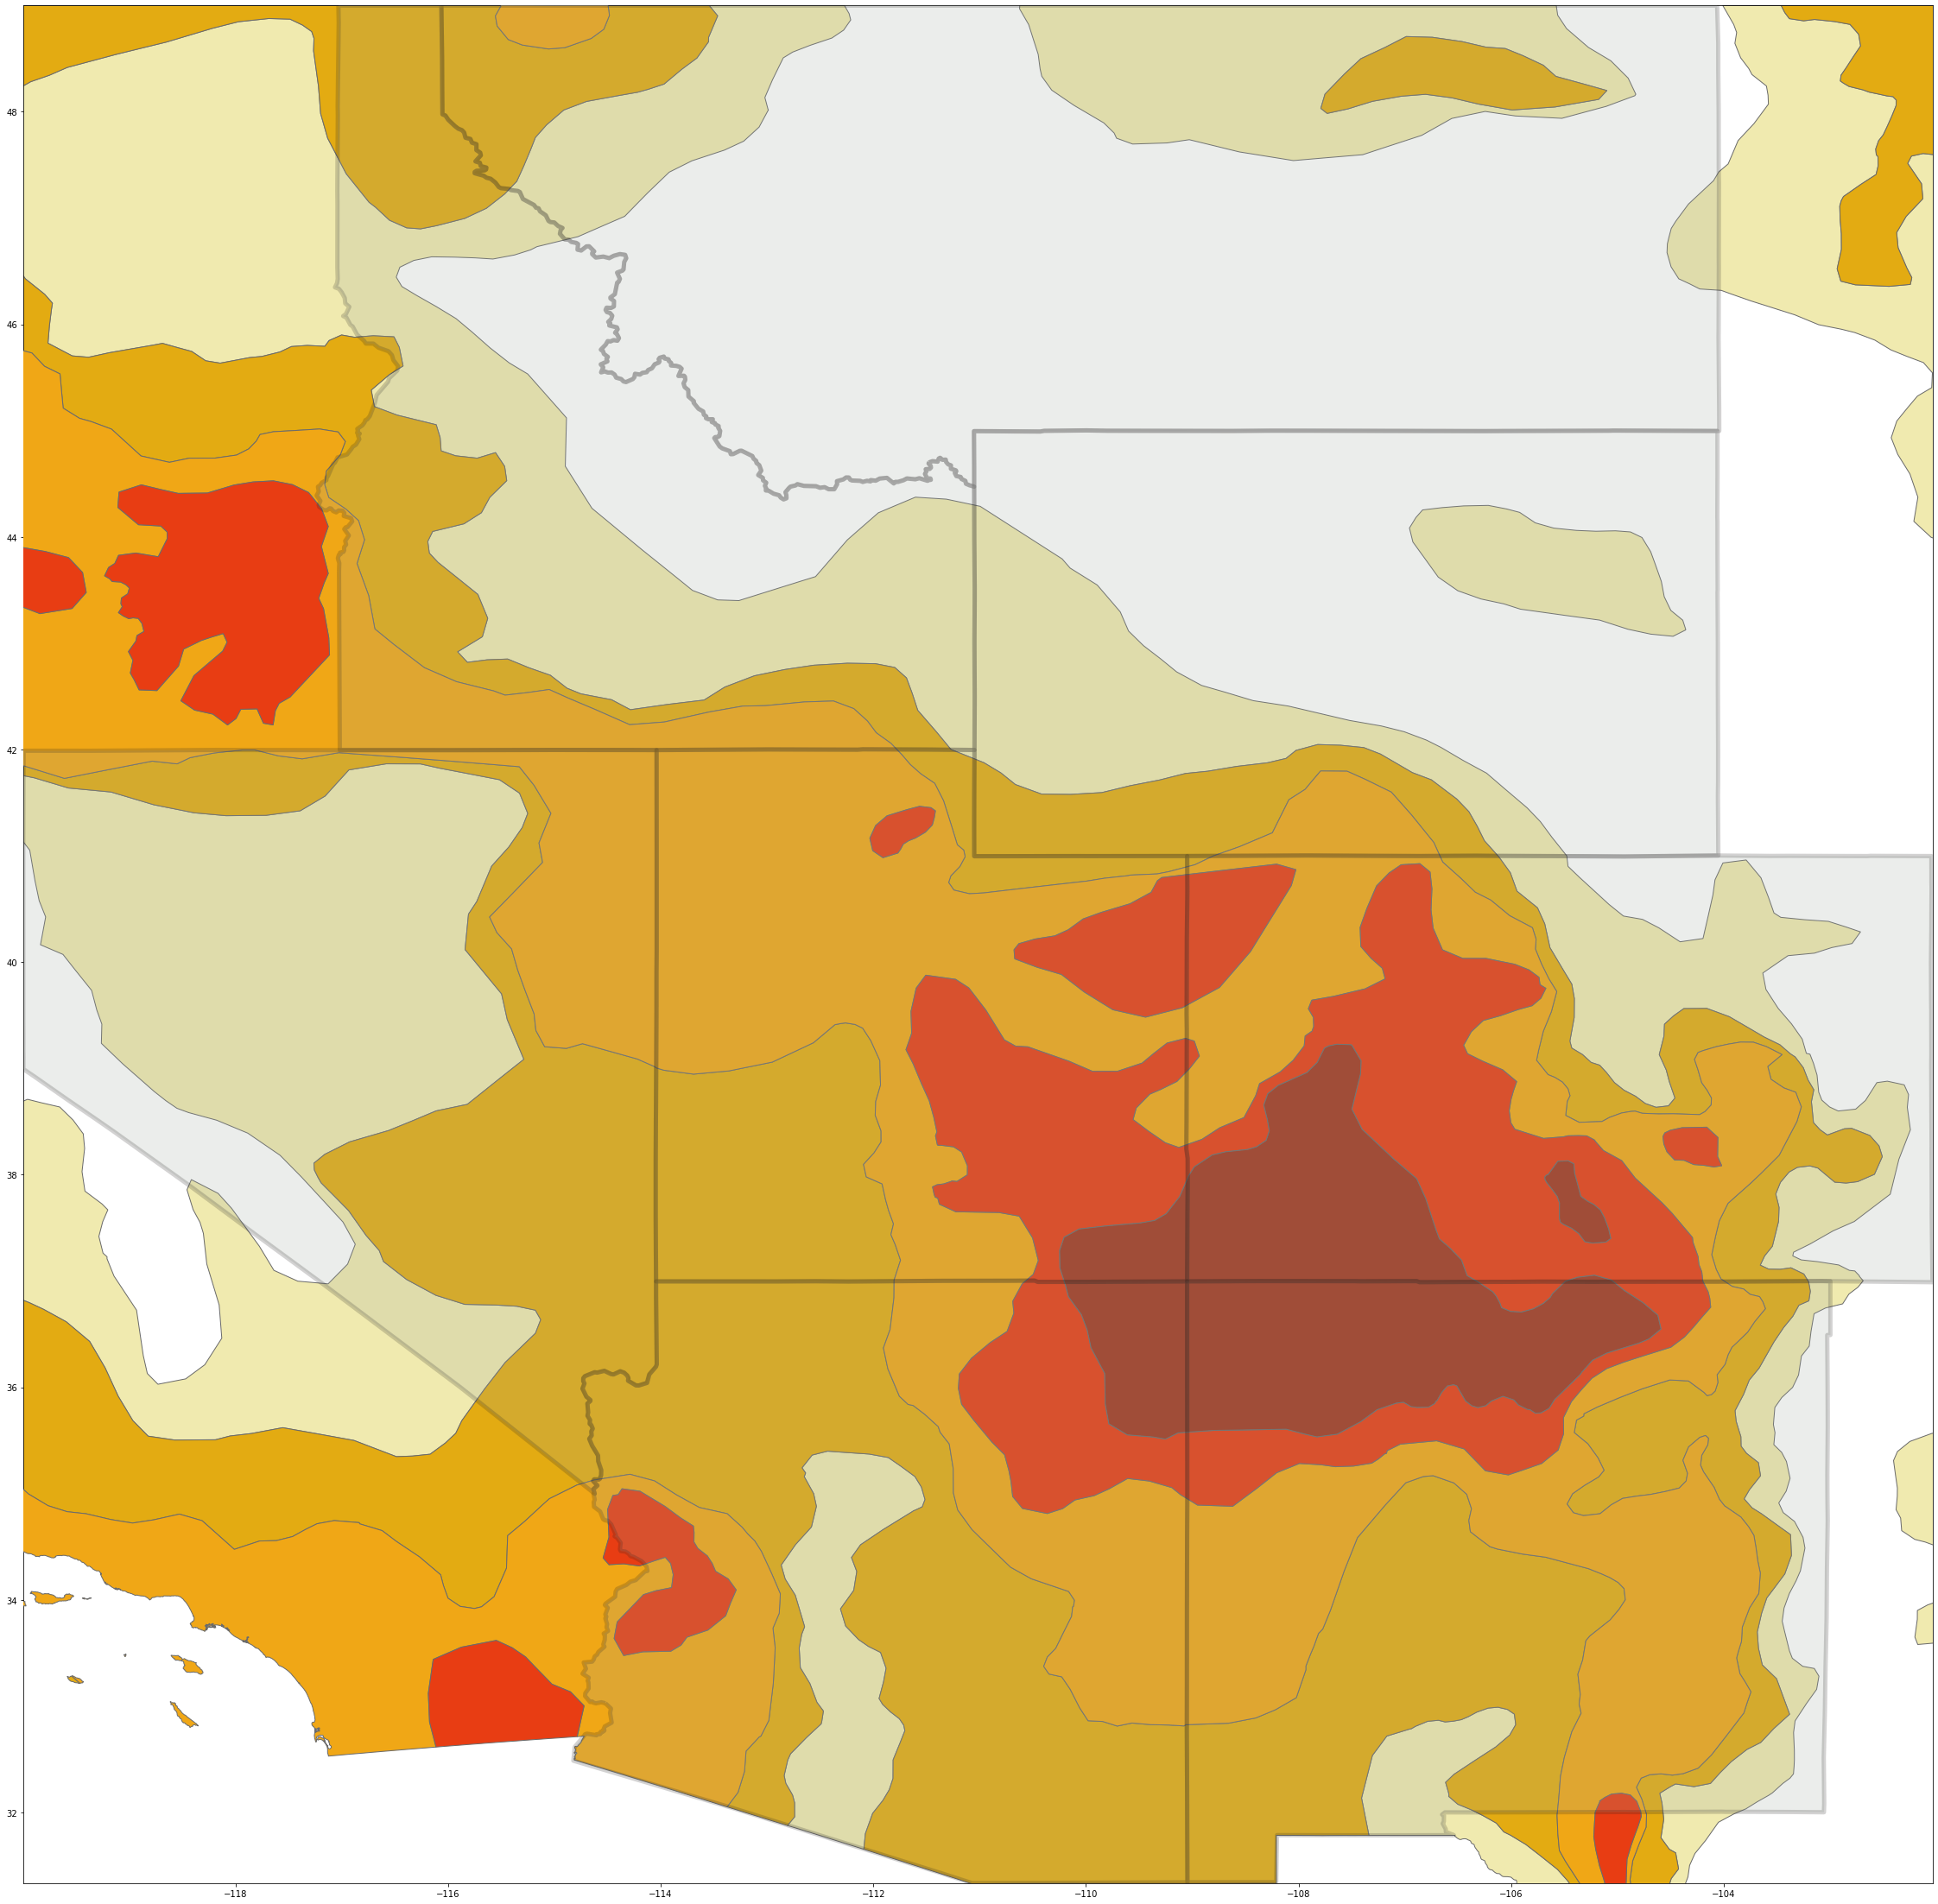

In [17]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Oct.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Oct.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Oct.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Oct.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Oct.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results of October 2018 Drought Levels </h3> 
<p>  In this map, we are starting to see that D4 or severe drought is moving east, into NM and CO. D3 is reduced in AZ in the southwest and now AZ, UT  are seeing more D2 and D1 type droughts. This may denote that the seasons are changing but we wont know that untill we see Novembers drought levels. </p> 
<p> Additional Research: Adding topology to these maps, may add additional understanding of where drought levels occur with regards to mountianious regions vs desert areas. </p> 

<h3> November 2018 Drought Levels </h3> 

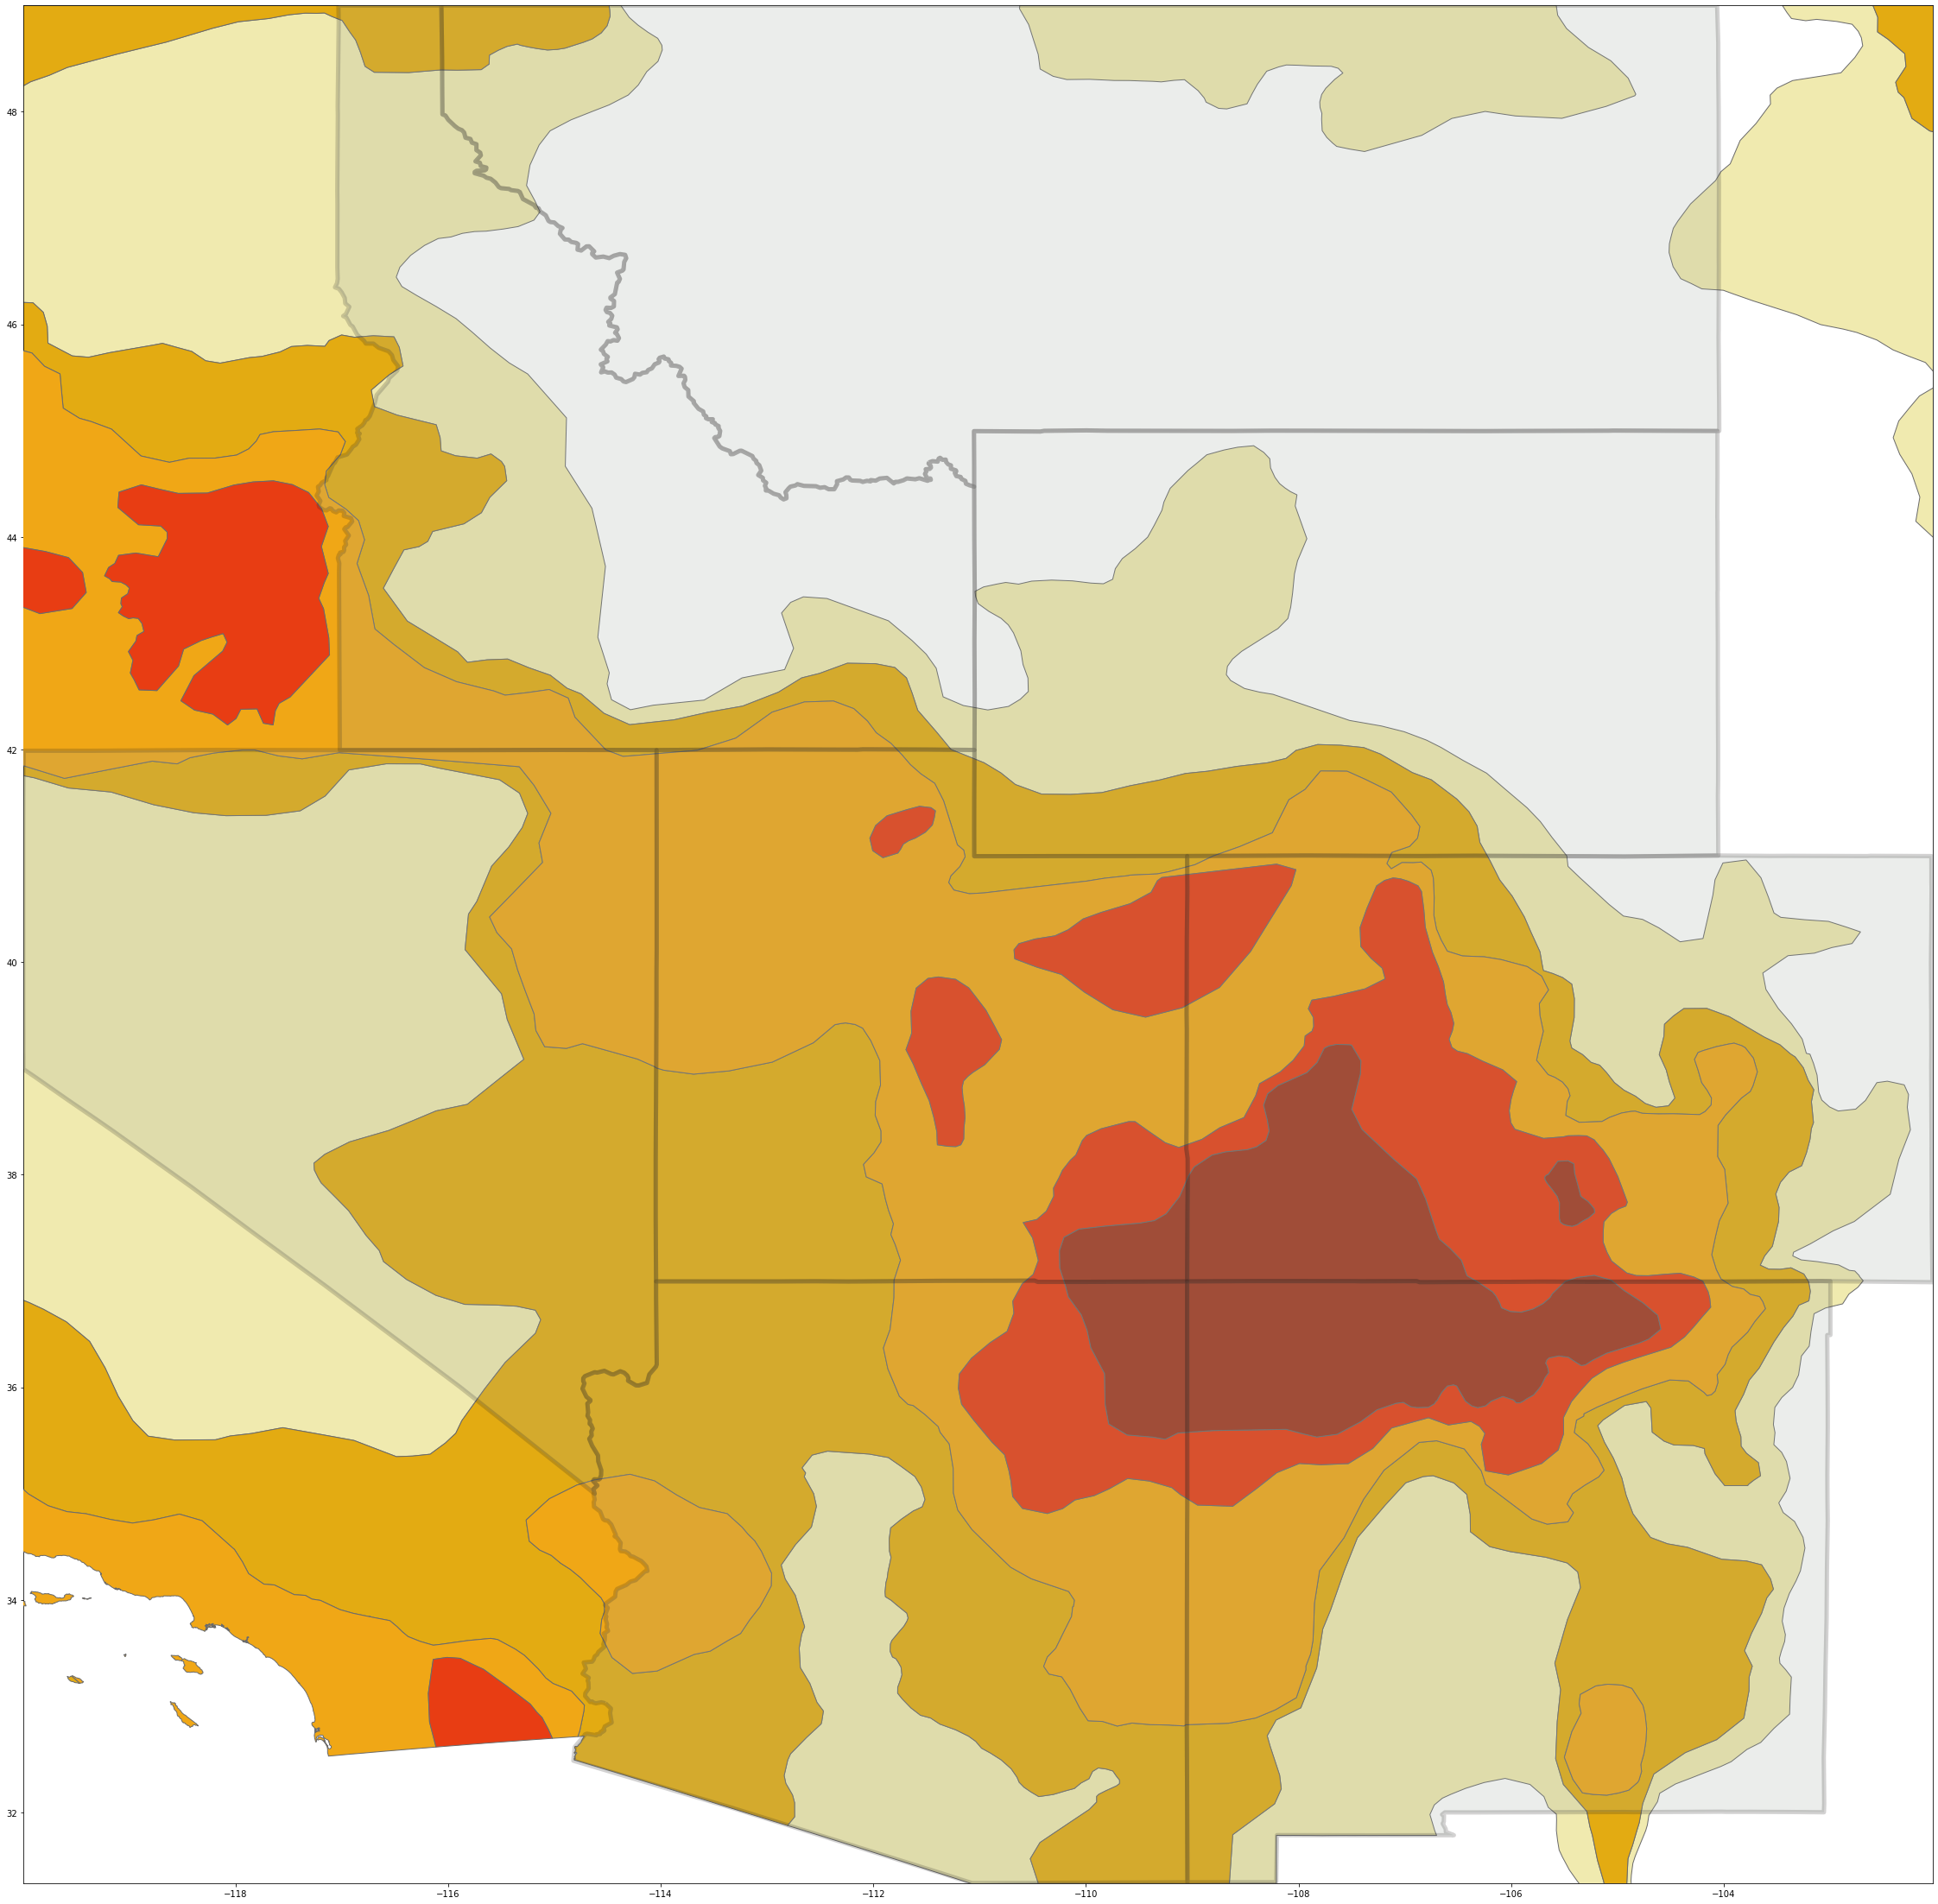

In [18]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Nov.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Nov.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Nov.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Nov.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Nov.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results of November 2018 Drought Levels </h3> 
<p> Drought is still pretty severe here in the four corner states. 
New Mexico, is seeing D4 and D3 levels of Drought in the Northern most part of their state. </p>

<p> However, D0 or Abnormally dry, may denote that this area is entering into or leaving a drought. AZ is experiancing D0 in the lower eastern section of the state, but is also experiancing large areas of D1. UT is seeing a little bit of D4 in the southeastern corner of that state, followed by D3, D2 which is a good portion of the state, this type of drought denotes that crops and people maybe impacted.and D1 on the western side of the state. CO, is starting to seelarger portion of D4 and D3 in the Southwestern portion followed by D2 and D1 along the northern and front range and lastly, in the east there is some D0 and then no drought on the eastern most portion of the state. </p> 

<p> Additional Research: Because some states are starting to see larger portions of D1 and D2 levels of drought, which denote crop losses, additional research should be done to look at what crops are largely affected when this level drought occurs. </p> 

<h3>Dec, Jan and Feb 2018 - 2019 Drought Data</h3> 
<p><b> Note on Groupings of Data</b> The first three month groupings consisted of what we typically consisder Fall and this next grouping is what we consider winter, these groupings  may add an additonal understanding of how drought occurs throughout the year. </p> 

In [19]:
# filter for Dec Drought Lvls  
D0_Dec = Dec_Drought[Dec_Drought['DM']==0]
D1_Dec = Dec_Drought[Dec_Drought['DM']==1]
D2_Dec = Dec_Drought[Dec_Drought['DM']==2]
D3_Dec = Dec_Drought[Dec_Drought['DM']==3]
D4_Dec = Dec_Drought[Dec_Drought['DM']==4]
# Filter for Jan Drought Lvls 
D0_Jan = Jan_Drought[Jan_Drought['DM']==0]
D1_Jan = Jan_Drought[Jan_Drought['DM']==1]
D2_Jan = Jan_Drought[Jan_Drought['DM']==2]
D3_Jan = Jan_Drought[Jan_Drought['DM']==3]
D4_Jan = Jan_Drought[Jan_Drought['DM']==4]
# Filter for Feb Drought Lvls 
D0_Feb = Feb_Drought[Feb_Drought['DM']==0] 
D1_Feb = Feb_Drought[Feb_Drought['DM']==1]
D2_Feb = Feb_Drought[Feb_Drought['DM']==2]
D3_Feb = Feb_Drought[Feb_Drought['DM']==3]
D4_Feb = Feb_Drought[Feb_Drought['DM']==4]

In [20]:
D0_Clip_Dec = D0_Dec[D0_Dec.geometry.intersects(Region_Poly)]
D1_Clip_Dec = D1_Dec[D1_Dec.geometry.intersects(Region_Poly)]
D2_Clip_Dec = D2_Dec[D2_Dec.geometry.intersects(Region_Poly)]
D3_Clip_Dec = D3_Dec[D3_Dec.geometry.intersects(Region_Poly)]
D4_Clip_Dec = D4_Dec[D4_Dec.geometry.intersects(Region_Poly)]
# January Intersects 
D0_Clip_Jan = D0_Jan[D0_Jan.geometry.intersects(Region_Poly)]
D1_Clip_Jan = D1_Jan[D1_Jan.geometry.intersects(Region_Poly)]
D2_Clip_Jan = D2_Jan[D2_Jan.geometry.intersects(Region_Poly)]
D3_Clip_Jan = D3_Jan[D3_Jan.geometry.intersects(Region_Poly)]
D4_Clip_Jan = D4_Jan[D4_Jan.geometry.intersects(Region_Poly)]
# Feb Intersects 
D0_Clip_Feb = D0_Feb[D0_Feb.geometry.intersects(Region_Poly)]
D1_Clip_Feb = D1_Feb[D1_Feb.geometry.intersects(Region_Poly)]
D2_Clip_Feb = D2_Feb[D2_Feb.geometry.intersects(Region_Poly)]
D3_Clip_Feb = D3_Feb[D3_Feb.geometry.intersects(Region_Poly)]
D4_Clip_Feb = D4_Feb[D4_Feb.geometry.intersects(Region_Poly)]

<h3> Plotting December 2018 Drought Levels </h3> 

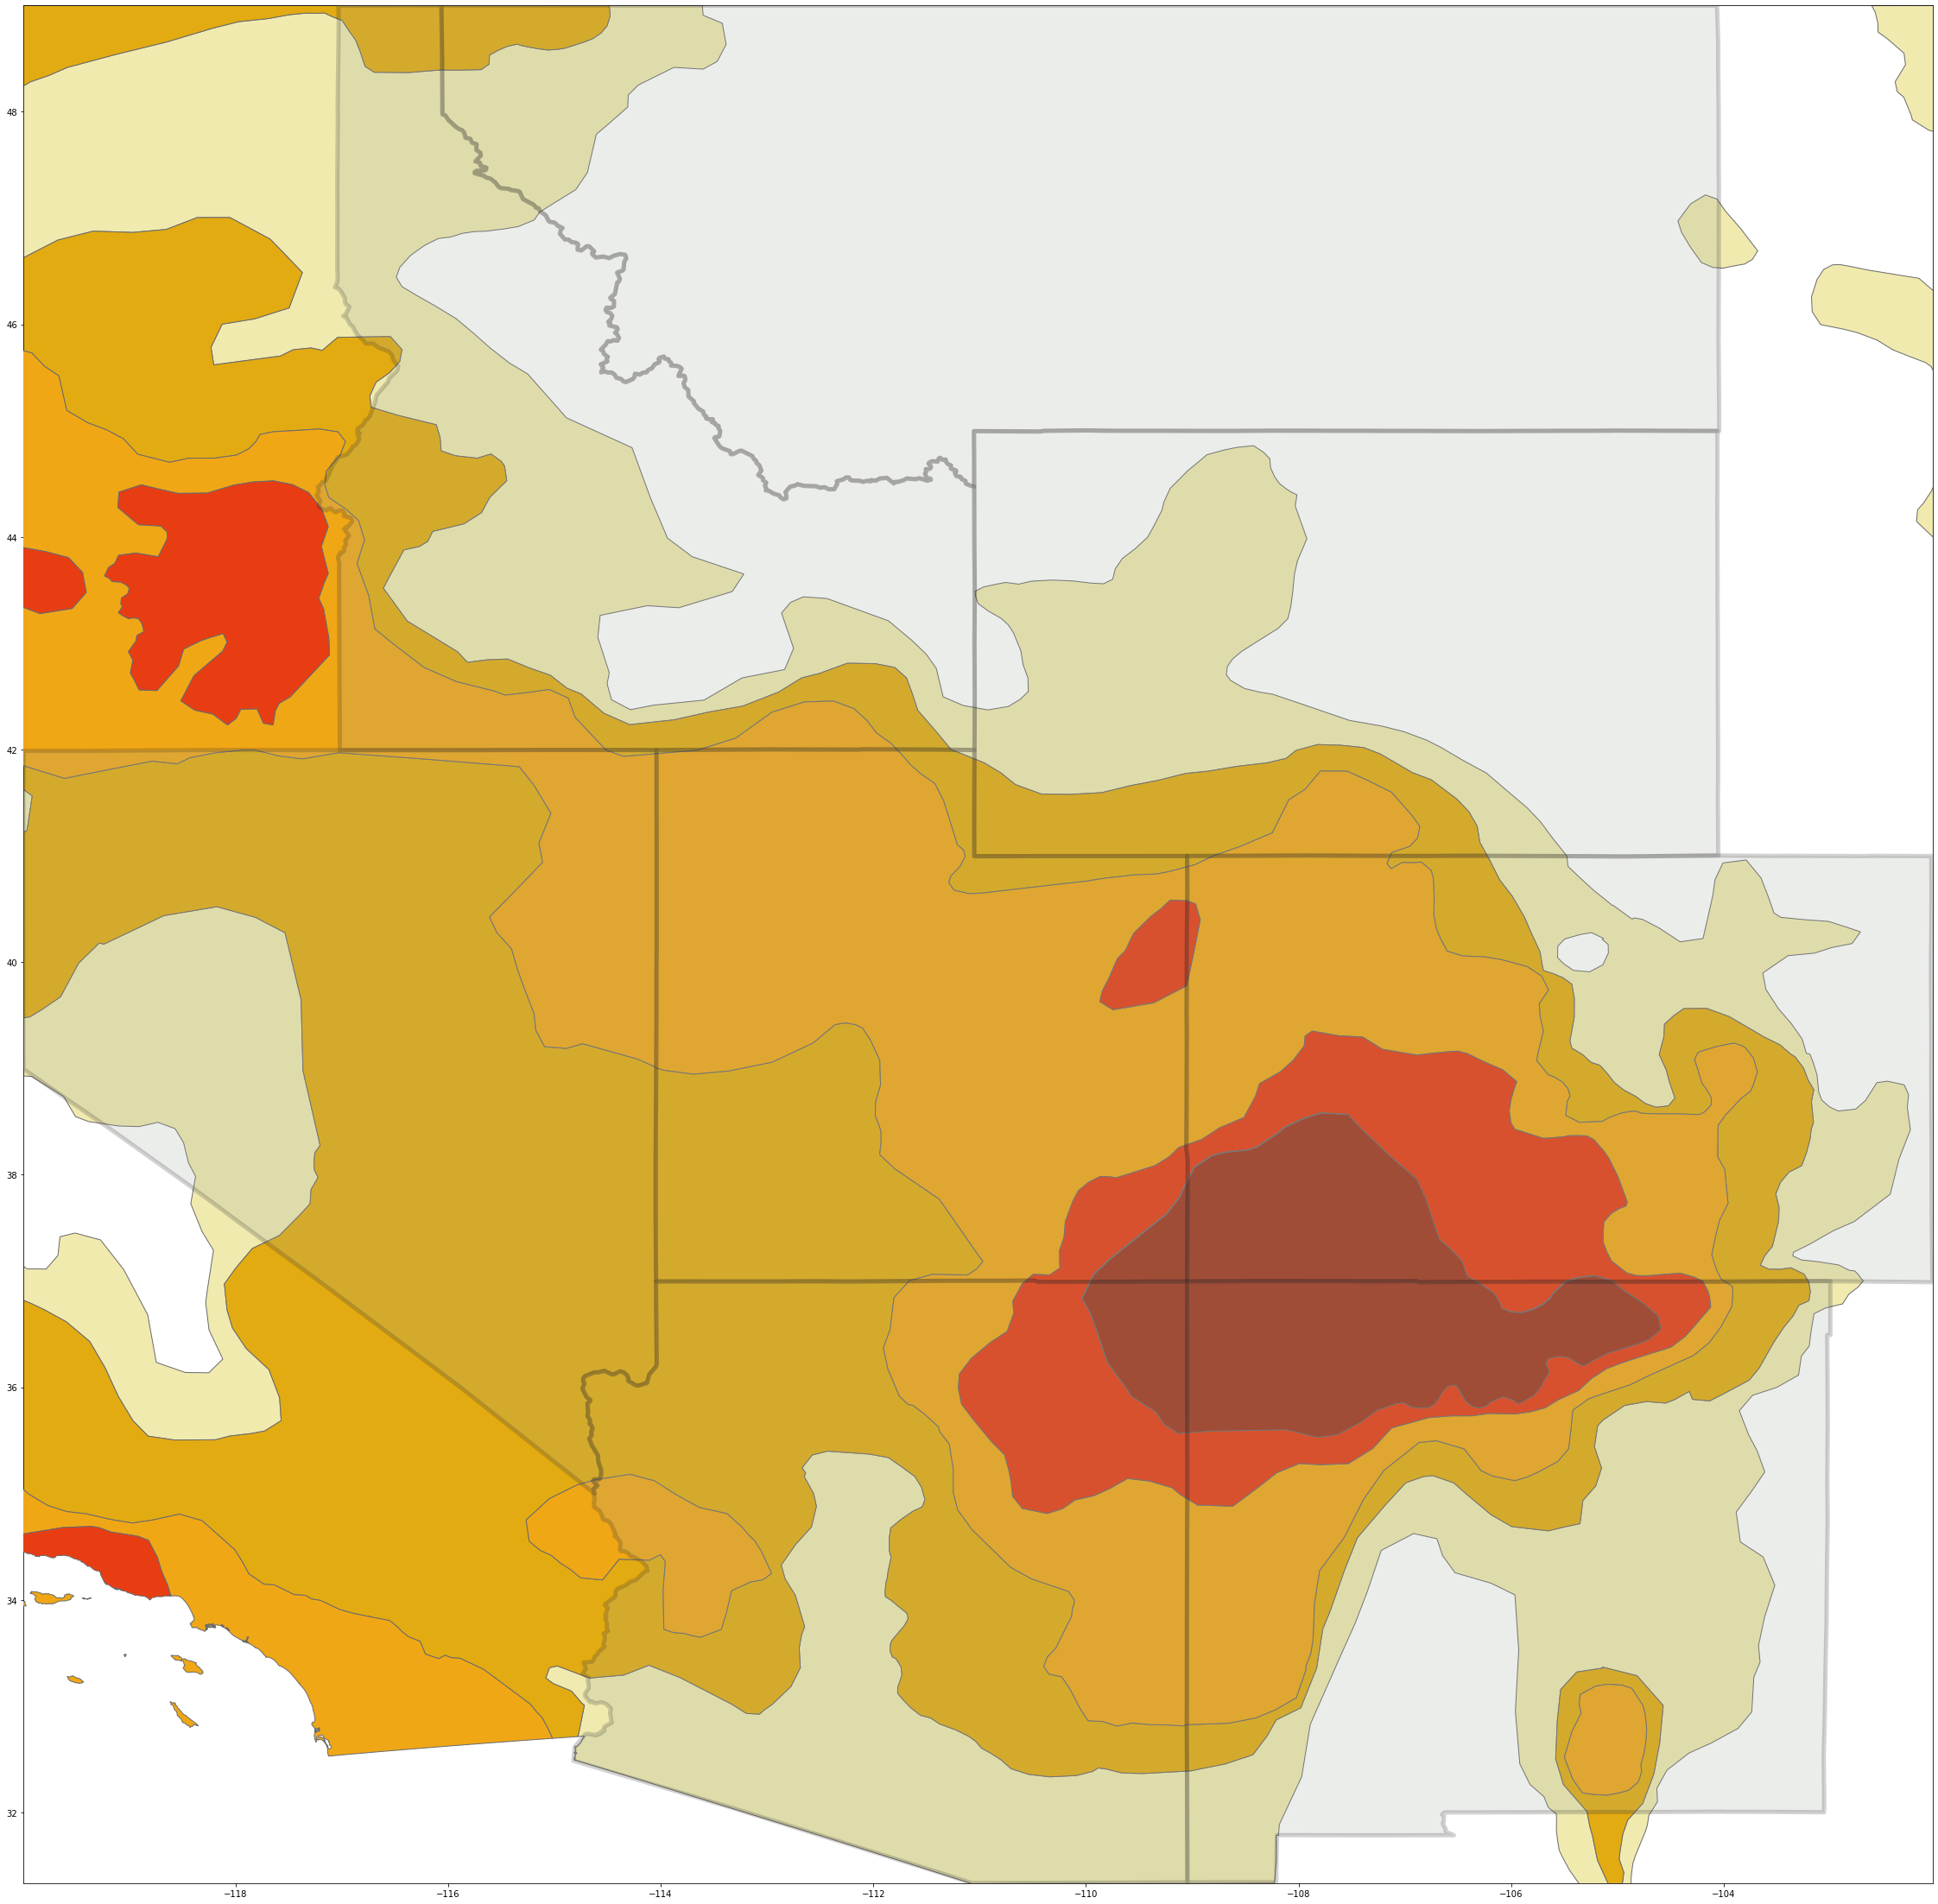

In [21]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Dec.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Dec.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Dec.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Dec.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Dec.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for December 2018 Drought Levels </h3> 
<p> December is starting to see some change in drought severity. So much so that we need to list out the changes by state.</p> 
   <li><b>Utah:</b> Is experiancing drought levels D2, D1 respectively. which will impact crops and crop loss. Arizona's southern portion of the state is growing in D0 level with that portion of the state becoming abnormally dry. However, The northern portion of the state is experiancing D1, D2, D3 and a small section of the state is at D4. There is some concern regarding water for crops and possibly the socio economic impacts in this area. </li> 
   <li><b>Colorado:</b> Is experiancing all 5 levels of drought, with the most severe drought (D4) occuring in the southwestern corner of the state.Extreame (D3) Drought is Occuring just a bit west of where the most severe drought is occuring.D2 and D1 are occuring in the north and lastly D0 is occuring on the eastern slope of the state, where a large portion of our farms are located. This maybe cause for concern.   </li> 
   <li><b>New Mexico:</b> In the Northern Part of the state, they are still seeing Severe Drought which has carried over from the pervious month. Extreme drought has shrunk  in addition to D2 and D1. There is a small patches of this drought levels occuring in the southeastern portion of the state. A large portion of the state is going through a Abornam Dry spell this month.  </li> 
   <li><b>Arizona:</b> This state is seeing all four levels of drought. From the northeastern corner we see severe drought, followed by a D3, which may be cause for concern regarding water avialablity in this area. D2 and D1 are larger portions of the state followed by a D1 in the lower portion of the state.</li> 

<h3> Plotting January 2019 Drought Levels </h3> 

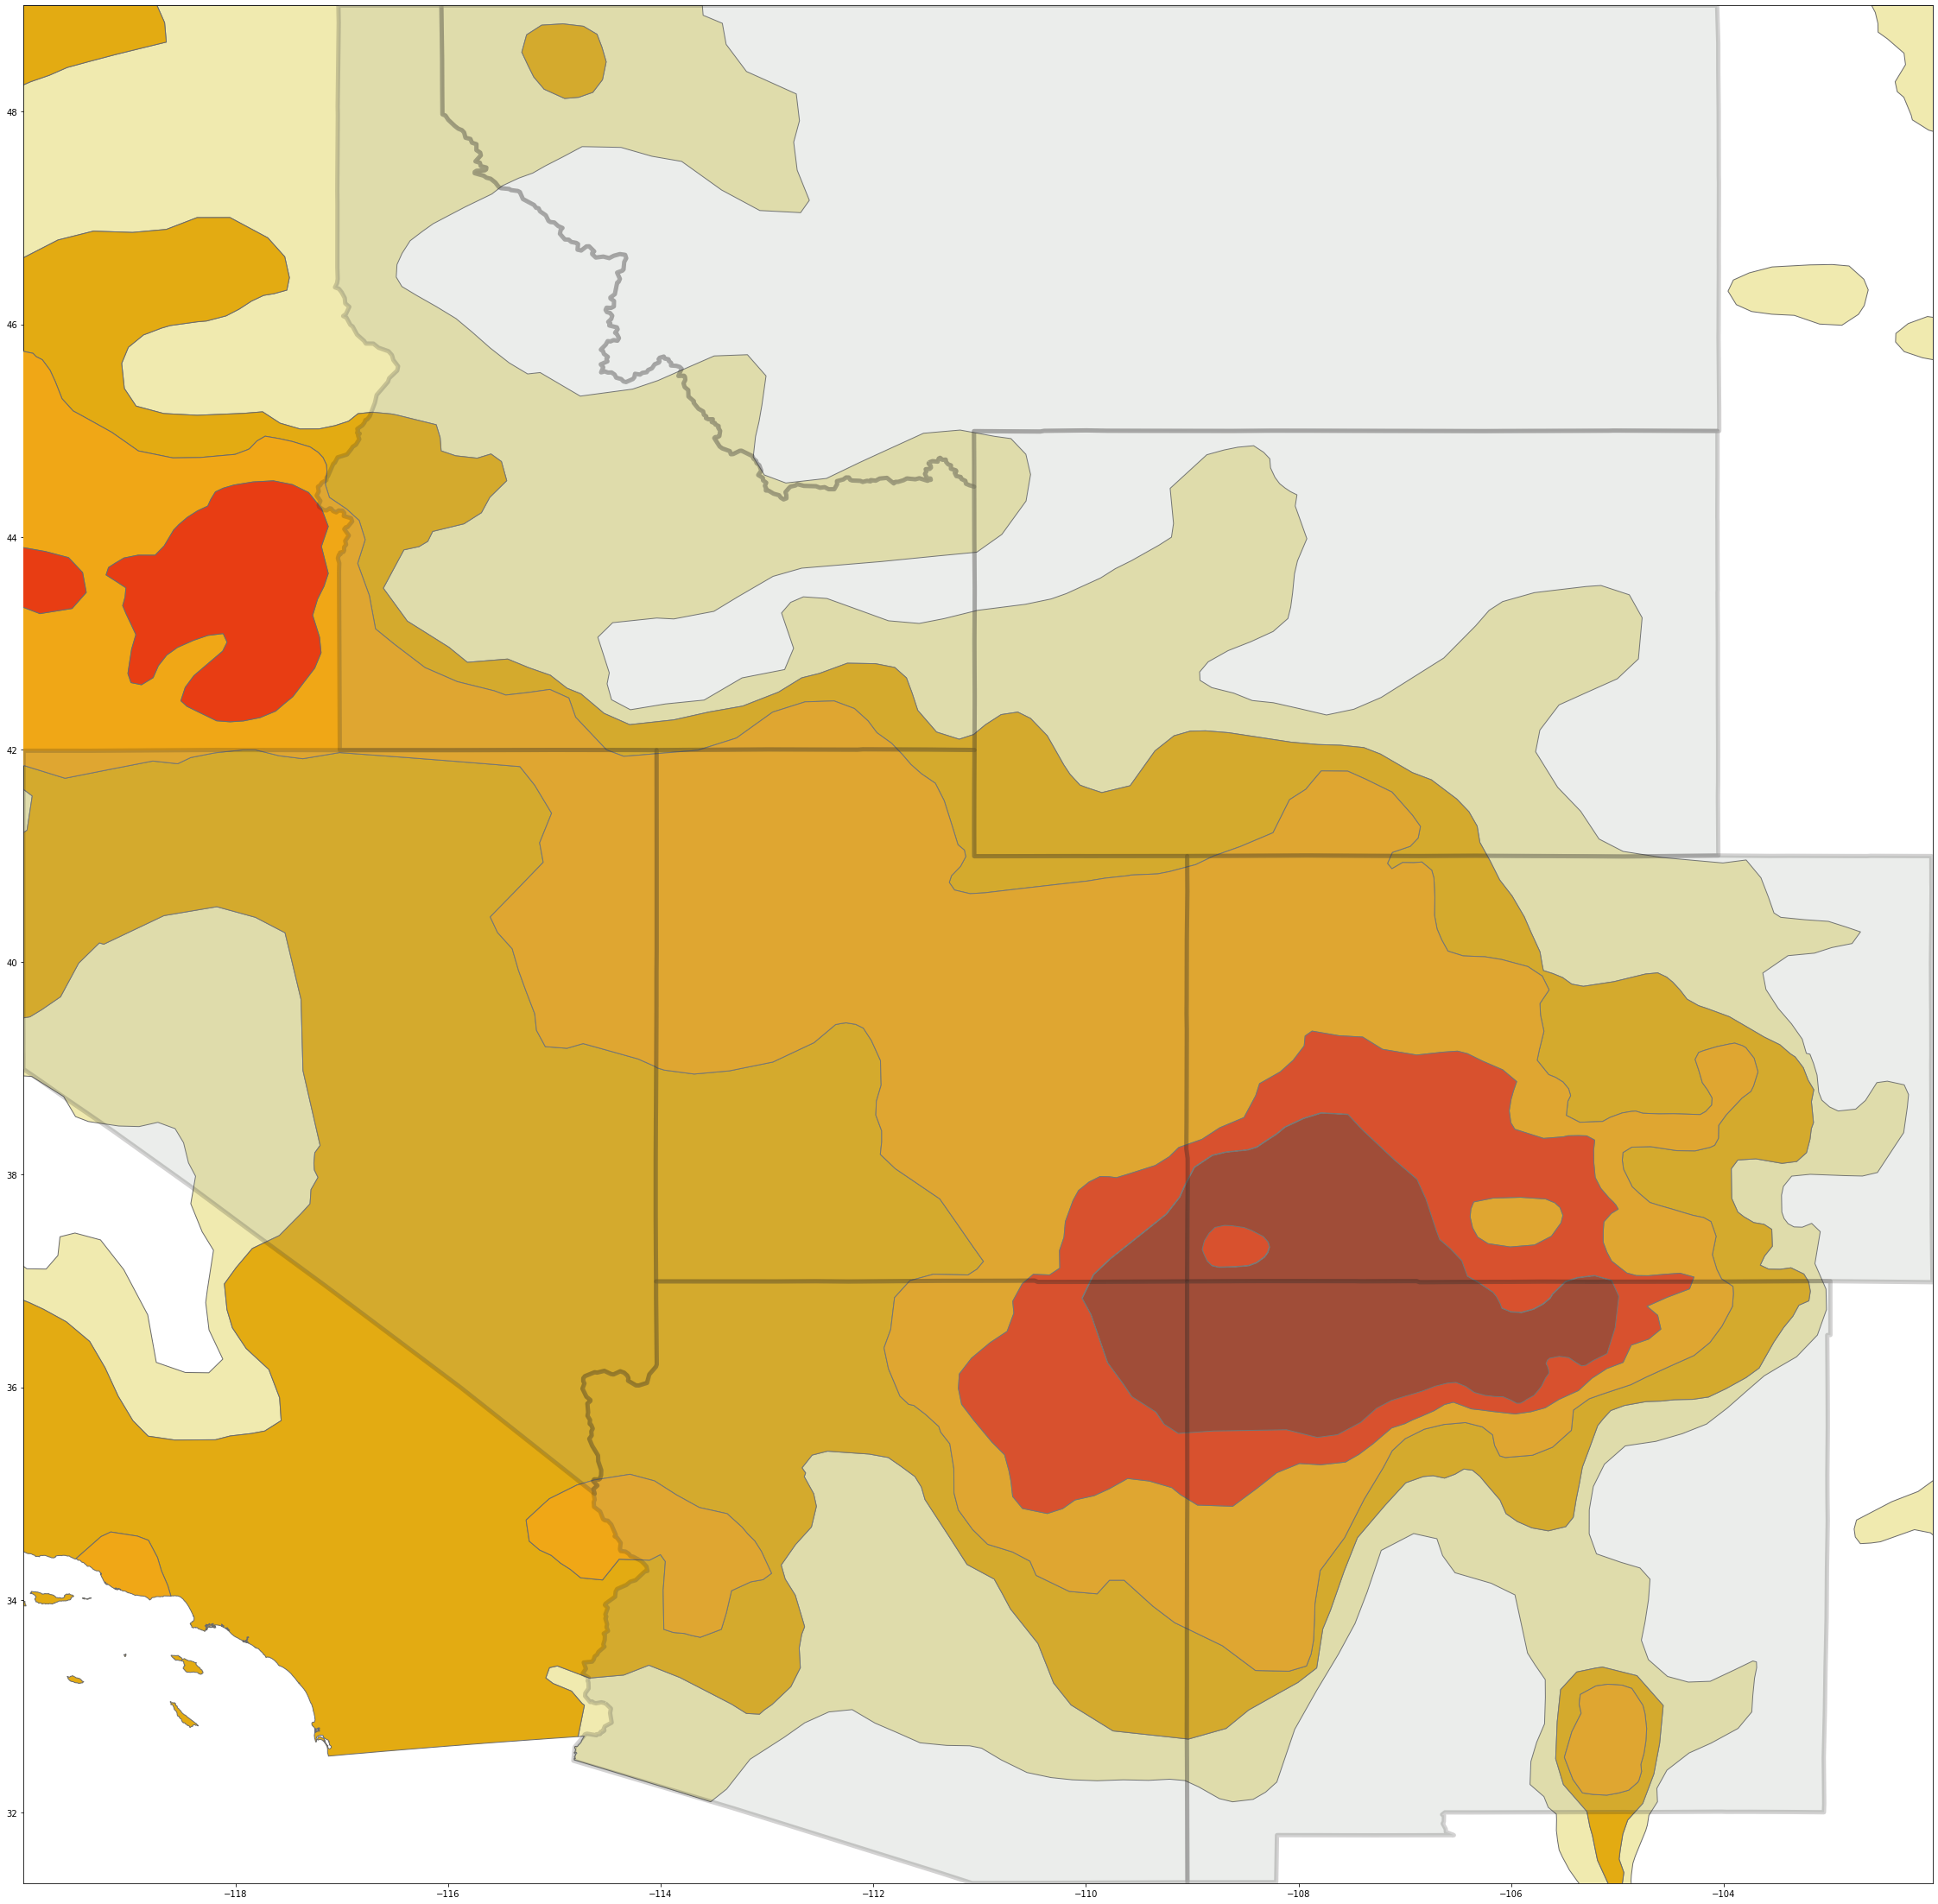

In [22]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Jan.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Jan.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Jan.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Jan.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Jan.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results from January 2019 Drought Levels </h3> 
<p> January is starting to see some change in NM and UT with No drought occuring in the southern  portion of the state. D1 Abnormal Dryness is slowly creeping it's way north in AZ. However CO has seen much difference except the holes in D4 and D3 where that drought is starting to let up. UT is starting to see some reduction in D4 and D3 drought levels from the pervious month. </p> 

<h3> Plotting Feburary 2019 Drought Levels </h3> 

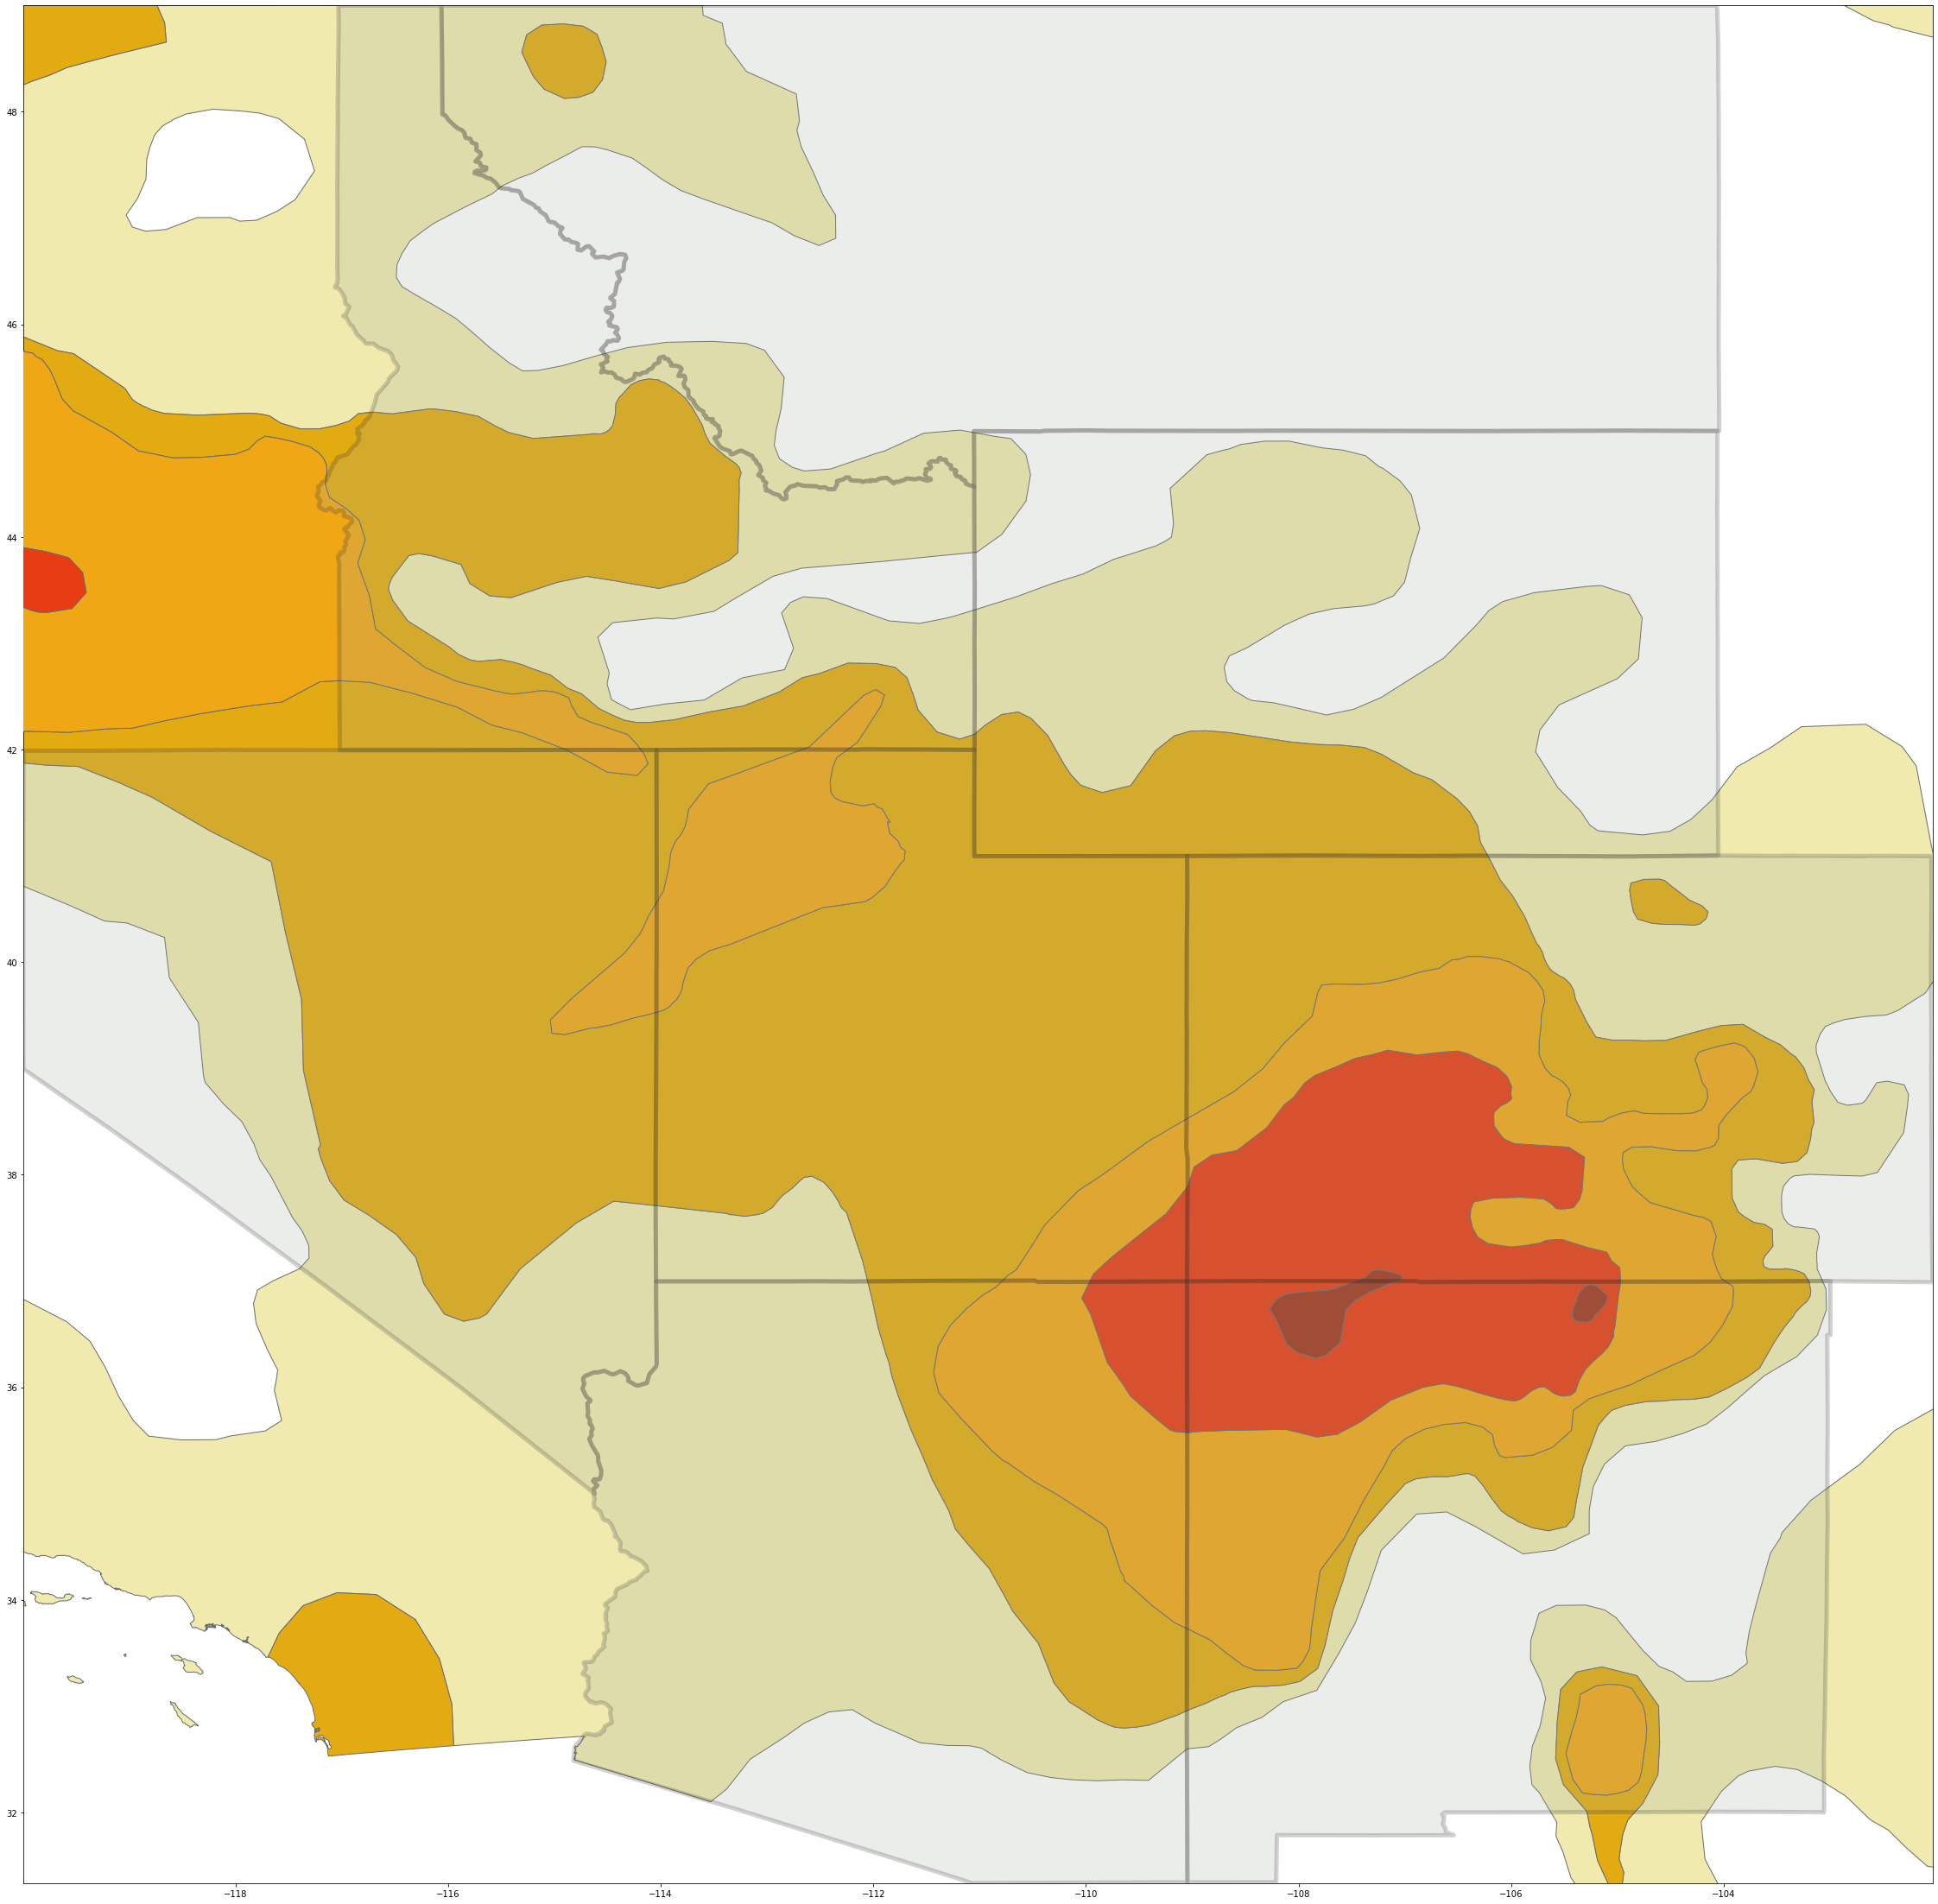

In [23]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Feb.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Feb.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Feb.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Feb.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Feb.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for Febuary 2019 Drought Levels </h3> 
<p> Large change from January to Febuary can be seen here, D1  Abnormal dryness has started to increase across the four states. 
In addition The most severe drought level has severely reduced. D3, D2 and D1 drought levels are still present and are larger then in pervious months. This may have to do with snow fall and rain over the course of the last few months. </p> 

<h3> Drought Data for March, April and May 2019 </h3> 

In [24]:
# filter for March Drought Lvls  
D0_Mar = Mar_Drought[Mar_Drought['DM']==0]
D1_Mar = Mar_Drought[Mar_Drought['DM']==1]
D2_Mar = Mar_Drought[Mar_Drought['DM']==2]
D3_Mar = Mar_Drought[Mar_Drought['DM']==3]
D4_Mar = Mar_Drought[Mar_Drought['DM']==4]
# Filter for April Drought Lvls 
D0_Apr = Apr_Drought[Apr_Drought['DM']==0]
D1_Apr = Apr_Drought[Apr_Drought['DM']==1]
D2_Apr = Apr_Drought[Apr_Drought['DM']==2]
D3_Apr = Apr_Drought[Apr_Drought['DM']==3]
D4_Apr = Apr_Drought[Apr_Drought['DM']==4]
# Filter for May Drought Lvls 
D0_May = May_Drought[May_Drought['DM']==0] 
D1_May = May_Drought[May_Drought['DM']==1]
D2_May = May_Drought[May_Drought['DM']==2]
D3_May = May_Drought[May_Drought['DM']==3]
D4_May = May_Drought[May_Drought['DM']==4]

In [25]:
D0_Clip_Mar = D0_Mar[D0_Mar.geometry.intersects(Region_Poly)]
D1_Clip_Mar = D1_Mar[D1_Mar.geometry.intersects(Region_Poly)]
D2_Clip_Mar = D2_Mar[D2_Mar.geometry.intersects(Region_Poly)]
D3_Clip_Mar = D3_Mar[D3_Mar.geometry.intersects(Region_Poly)]
D4_Clip_Mar = D4_Mar[D4_Mar.geometry.intersects(Region_Poly)]
# October Intersects 
D0_Clip_Apr = D0_Apr[D0_Apr.geometry.intersects(Region_Poly)]
D1_Clip_Apr = D1_Apr[D1_Apr.geometry.intersects(Region_Poly)]
D2_Clip_Apr = D2_Apr[D2_Apr.geometry.intersects(Region_Poly)]
D3_Clip_Apr = D3_Apr[D3_Apr.geometry.intersects(Region_Poly)]
D4_Clip_Apr = D4_Apr[D4_Apr.geometry.intersects(Region_Poly)]
# November Intersects 
D0_Clip_May = D0_May[D0_May.geometry.intersects(Region_Poly)]
D1_Clip_May = D1_May[D1_May.geometry.intersects(Region_Poly)]
D2_Clip_May = D2_May[D2_May.geometry.intersects(Region_Poly)]
D3_Clip_May = D3_May[D3_May.geometry.intersects(Region_Poly)]
D4_Clip_May = D4_May[D4_May.geometry.intersects(Region_Poly)]

<h3>  Plotting March 2019 Drought Levels</h3>

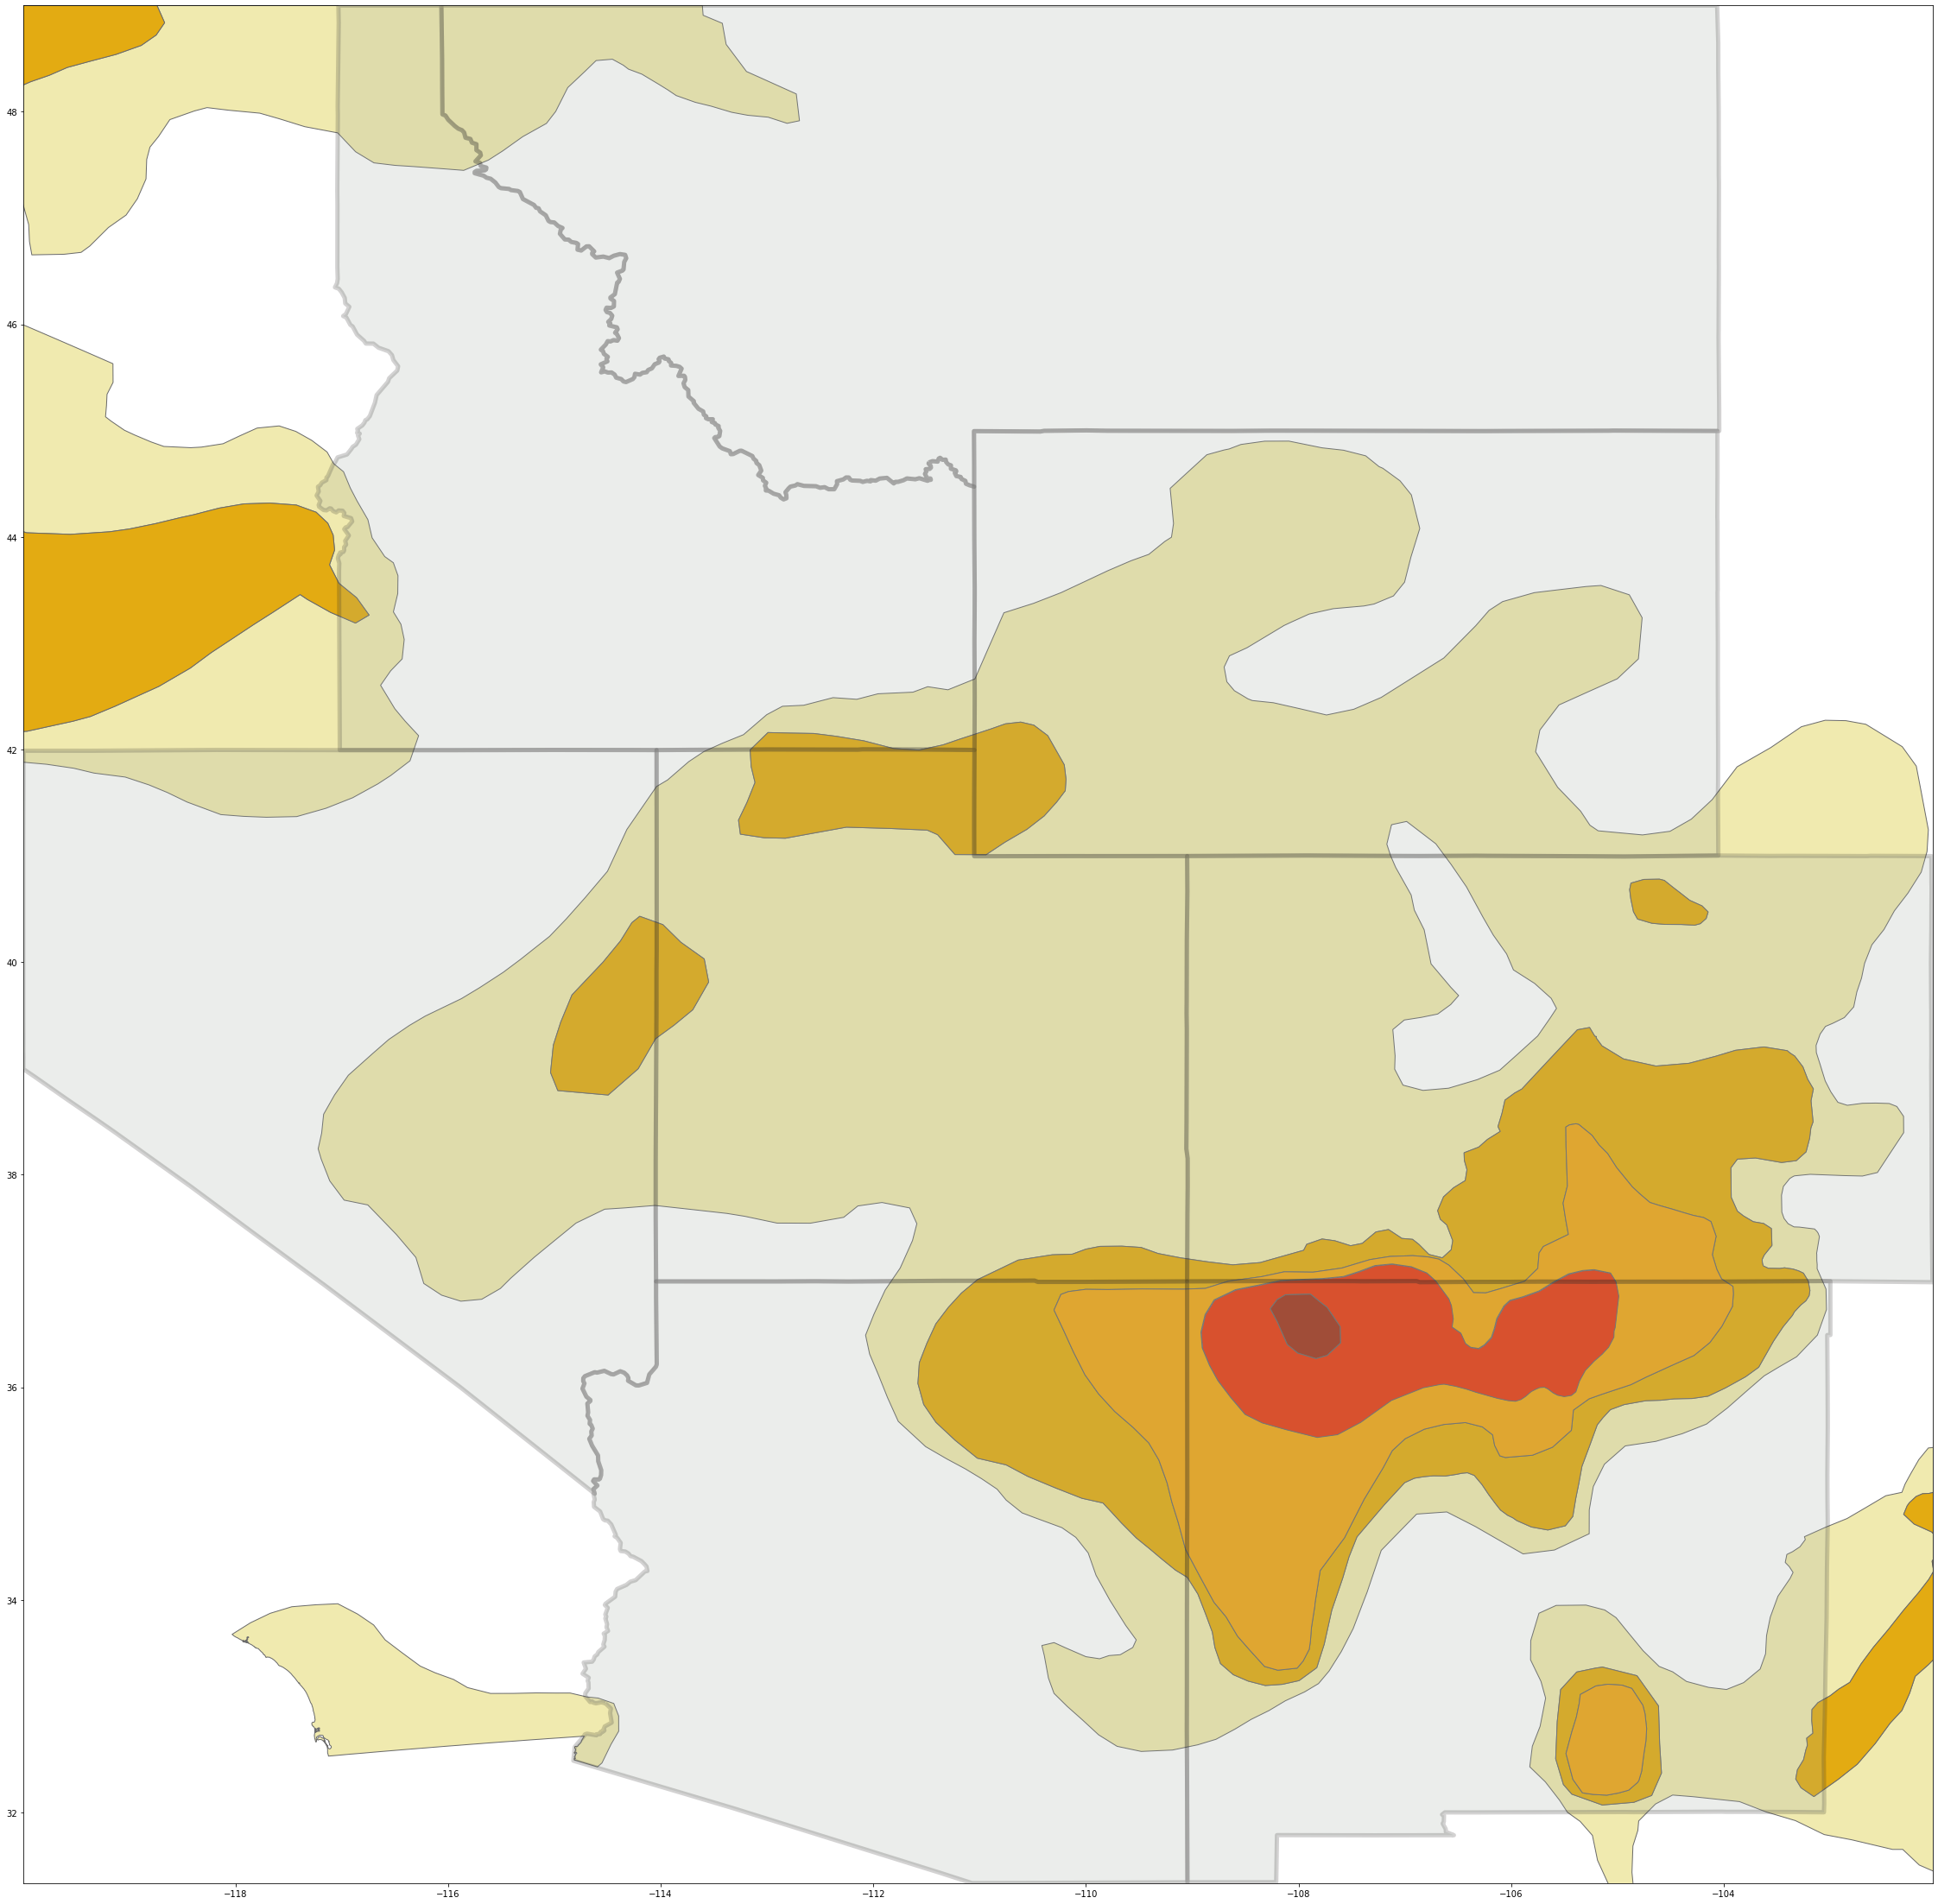

In [26]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Mar.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Mar.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Mar.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Mar.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Mar.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for March 2019 Drought Levels </h3> 
<p> According to the USGS, Drought is defined as: "drought is a prolonged period when precipitation is less than normal." <a href="https://www.usgs.gov/special-topic/water-science-school/science/droughts-things-know?qt-science_center_objects=0#what"> --USGS Drought</a>
    Based on this defition, we can start to see how drought changes over time. Just in the period of a month we have started to see a decrease in the four corner states of drought levels. While there is still drought occuring in AZ, NM and CO the worst of it is significantly smaller in this month then in pervious months.</p> 

<h3> Plotting April 2019 Drought Levels </h3>

C:\Users\rstev\Anaconda3\envs\FinalProj\lib\site-packages\geopandas\plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


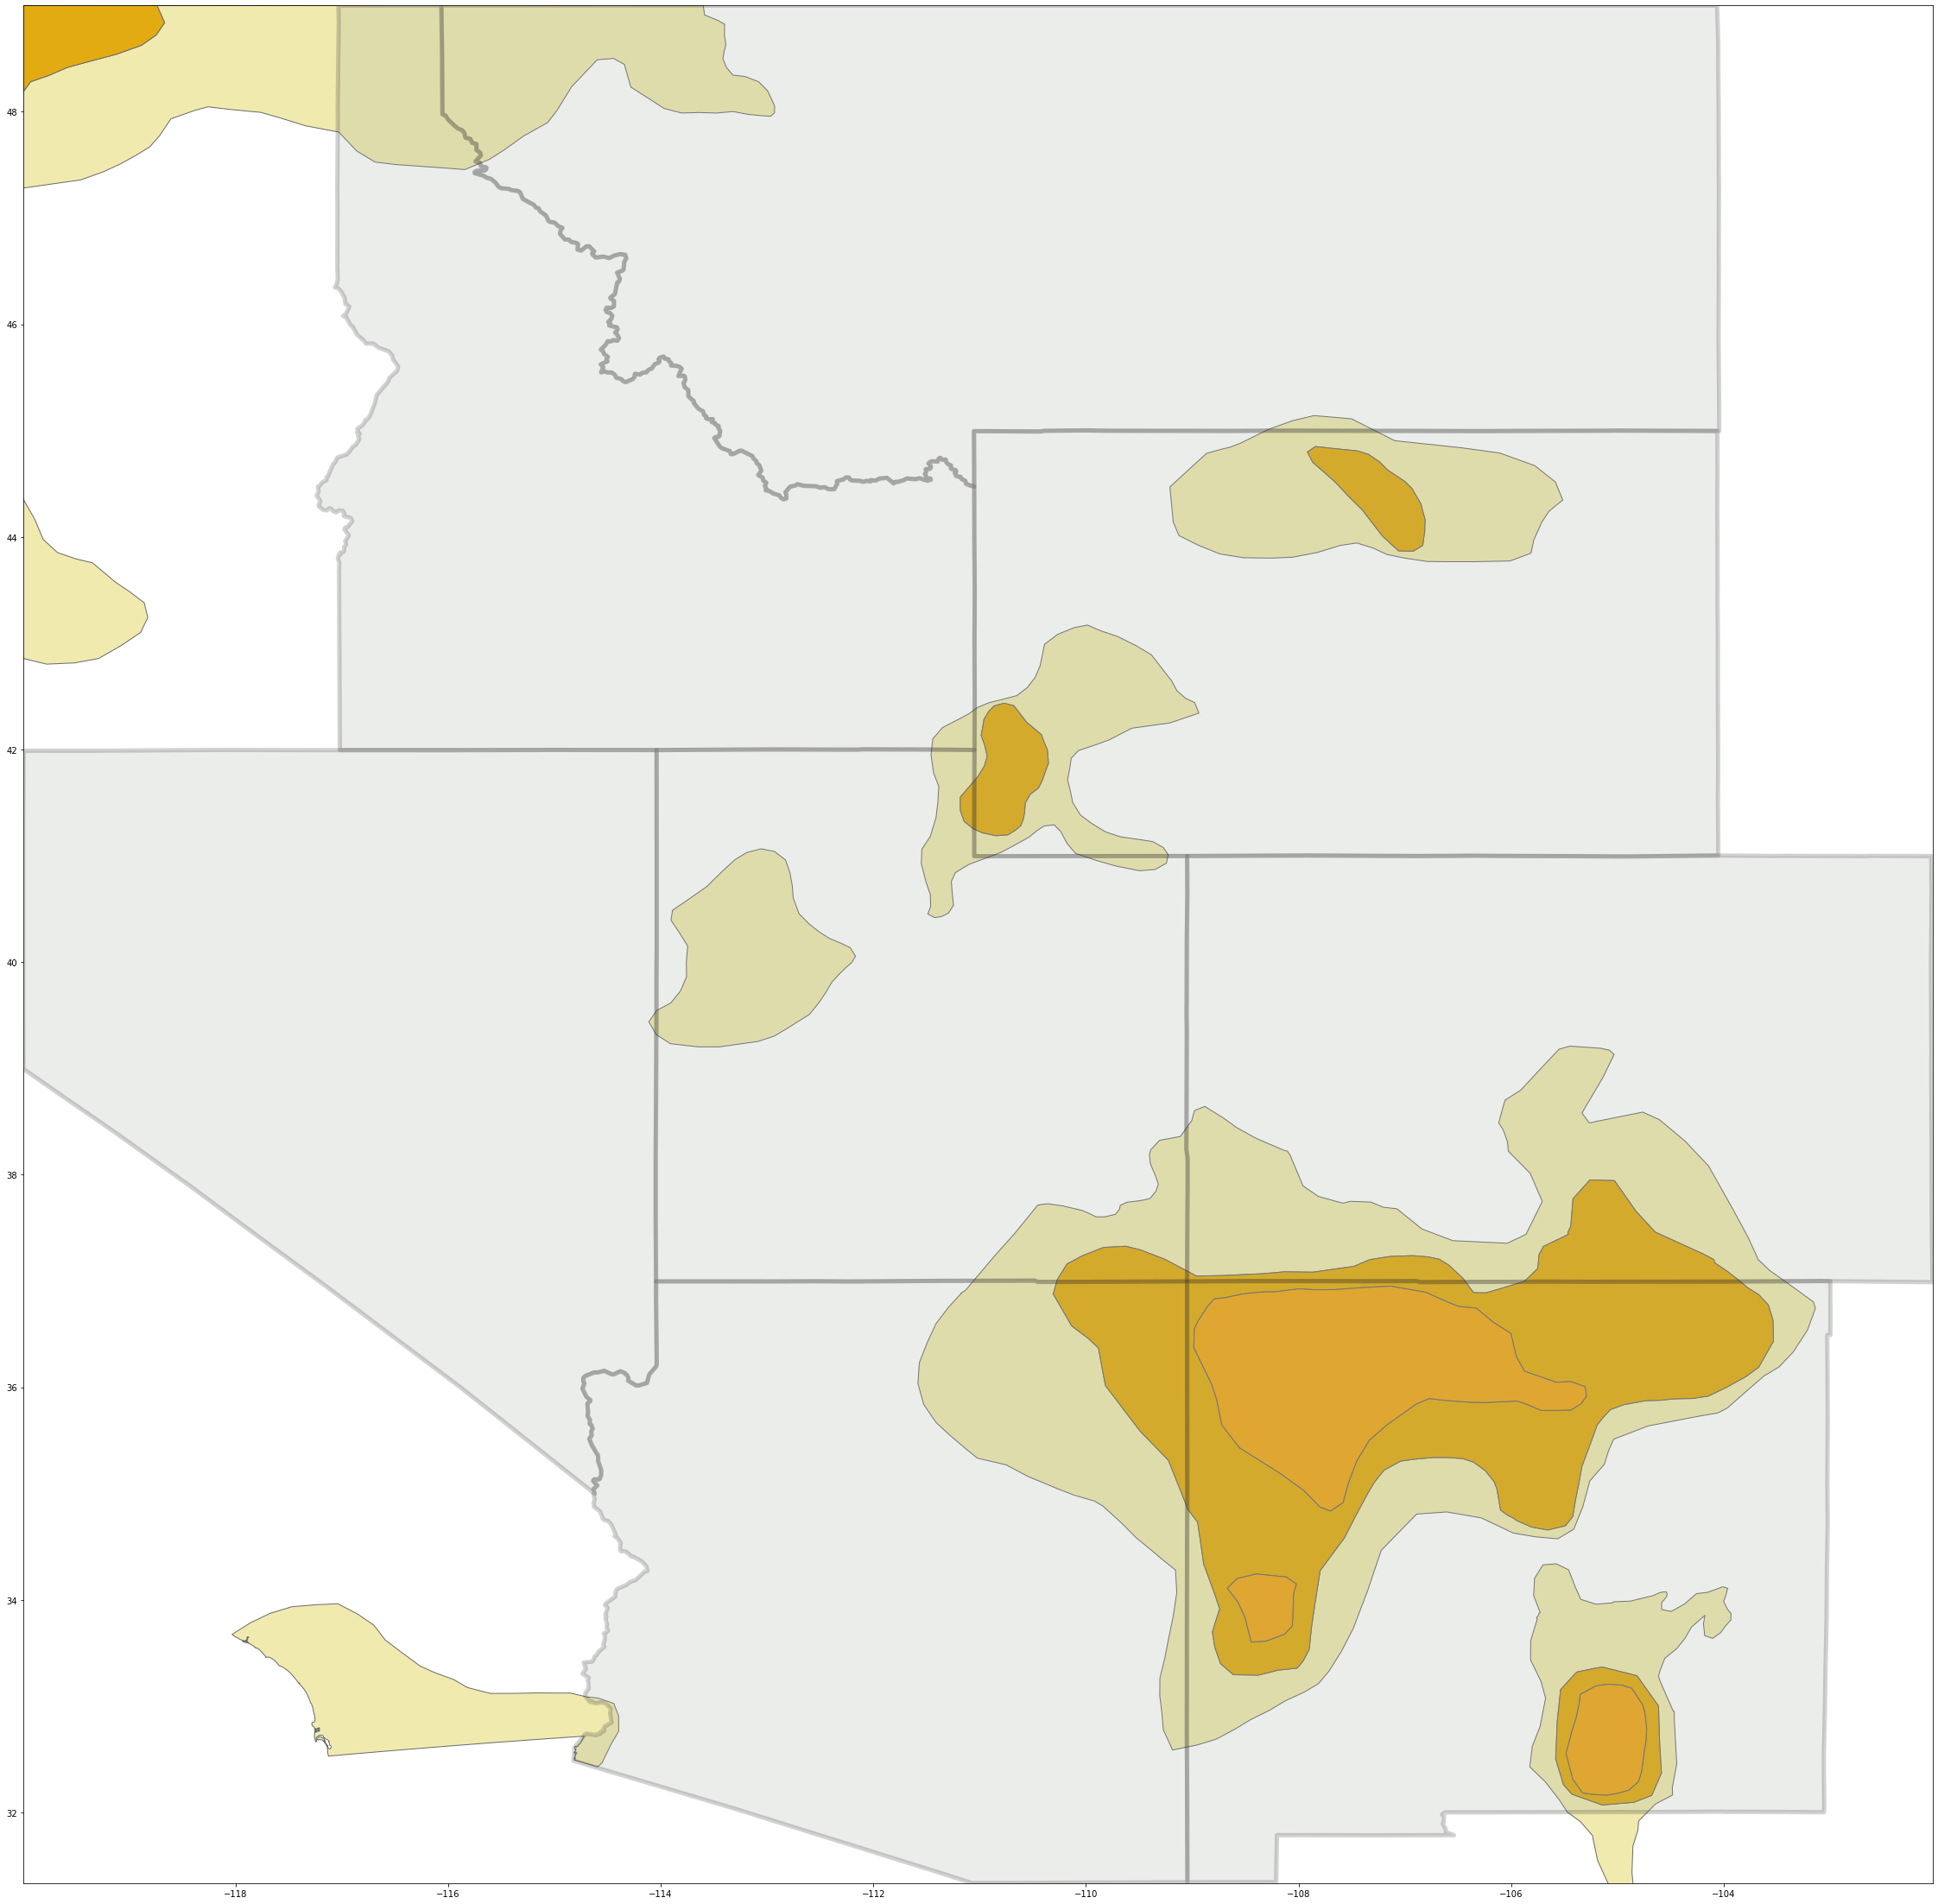

In [27]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Apr.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Apr.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Apr.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Apr.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Apr.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for April 2019 Drought Levels </h3> 
<p> April shows a major change in drought levels to the four corner states. The drought levels seen here are levels of abnormal dryness and D1 and D2 levels that may be affecting crops  and vegitation in these areas.</p> 

<h3> Plotting May 2019 Drought Levels </h3>

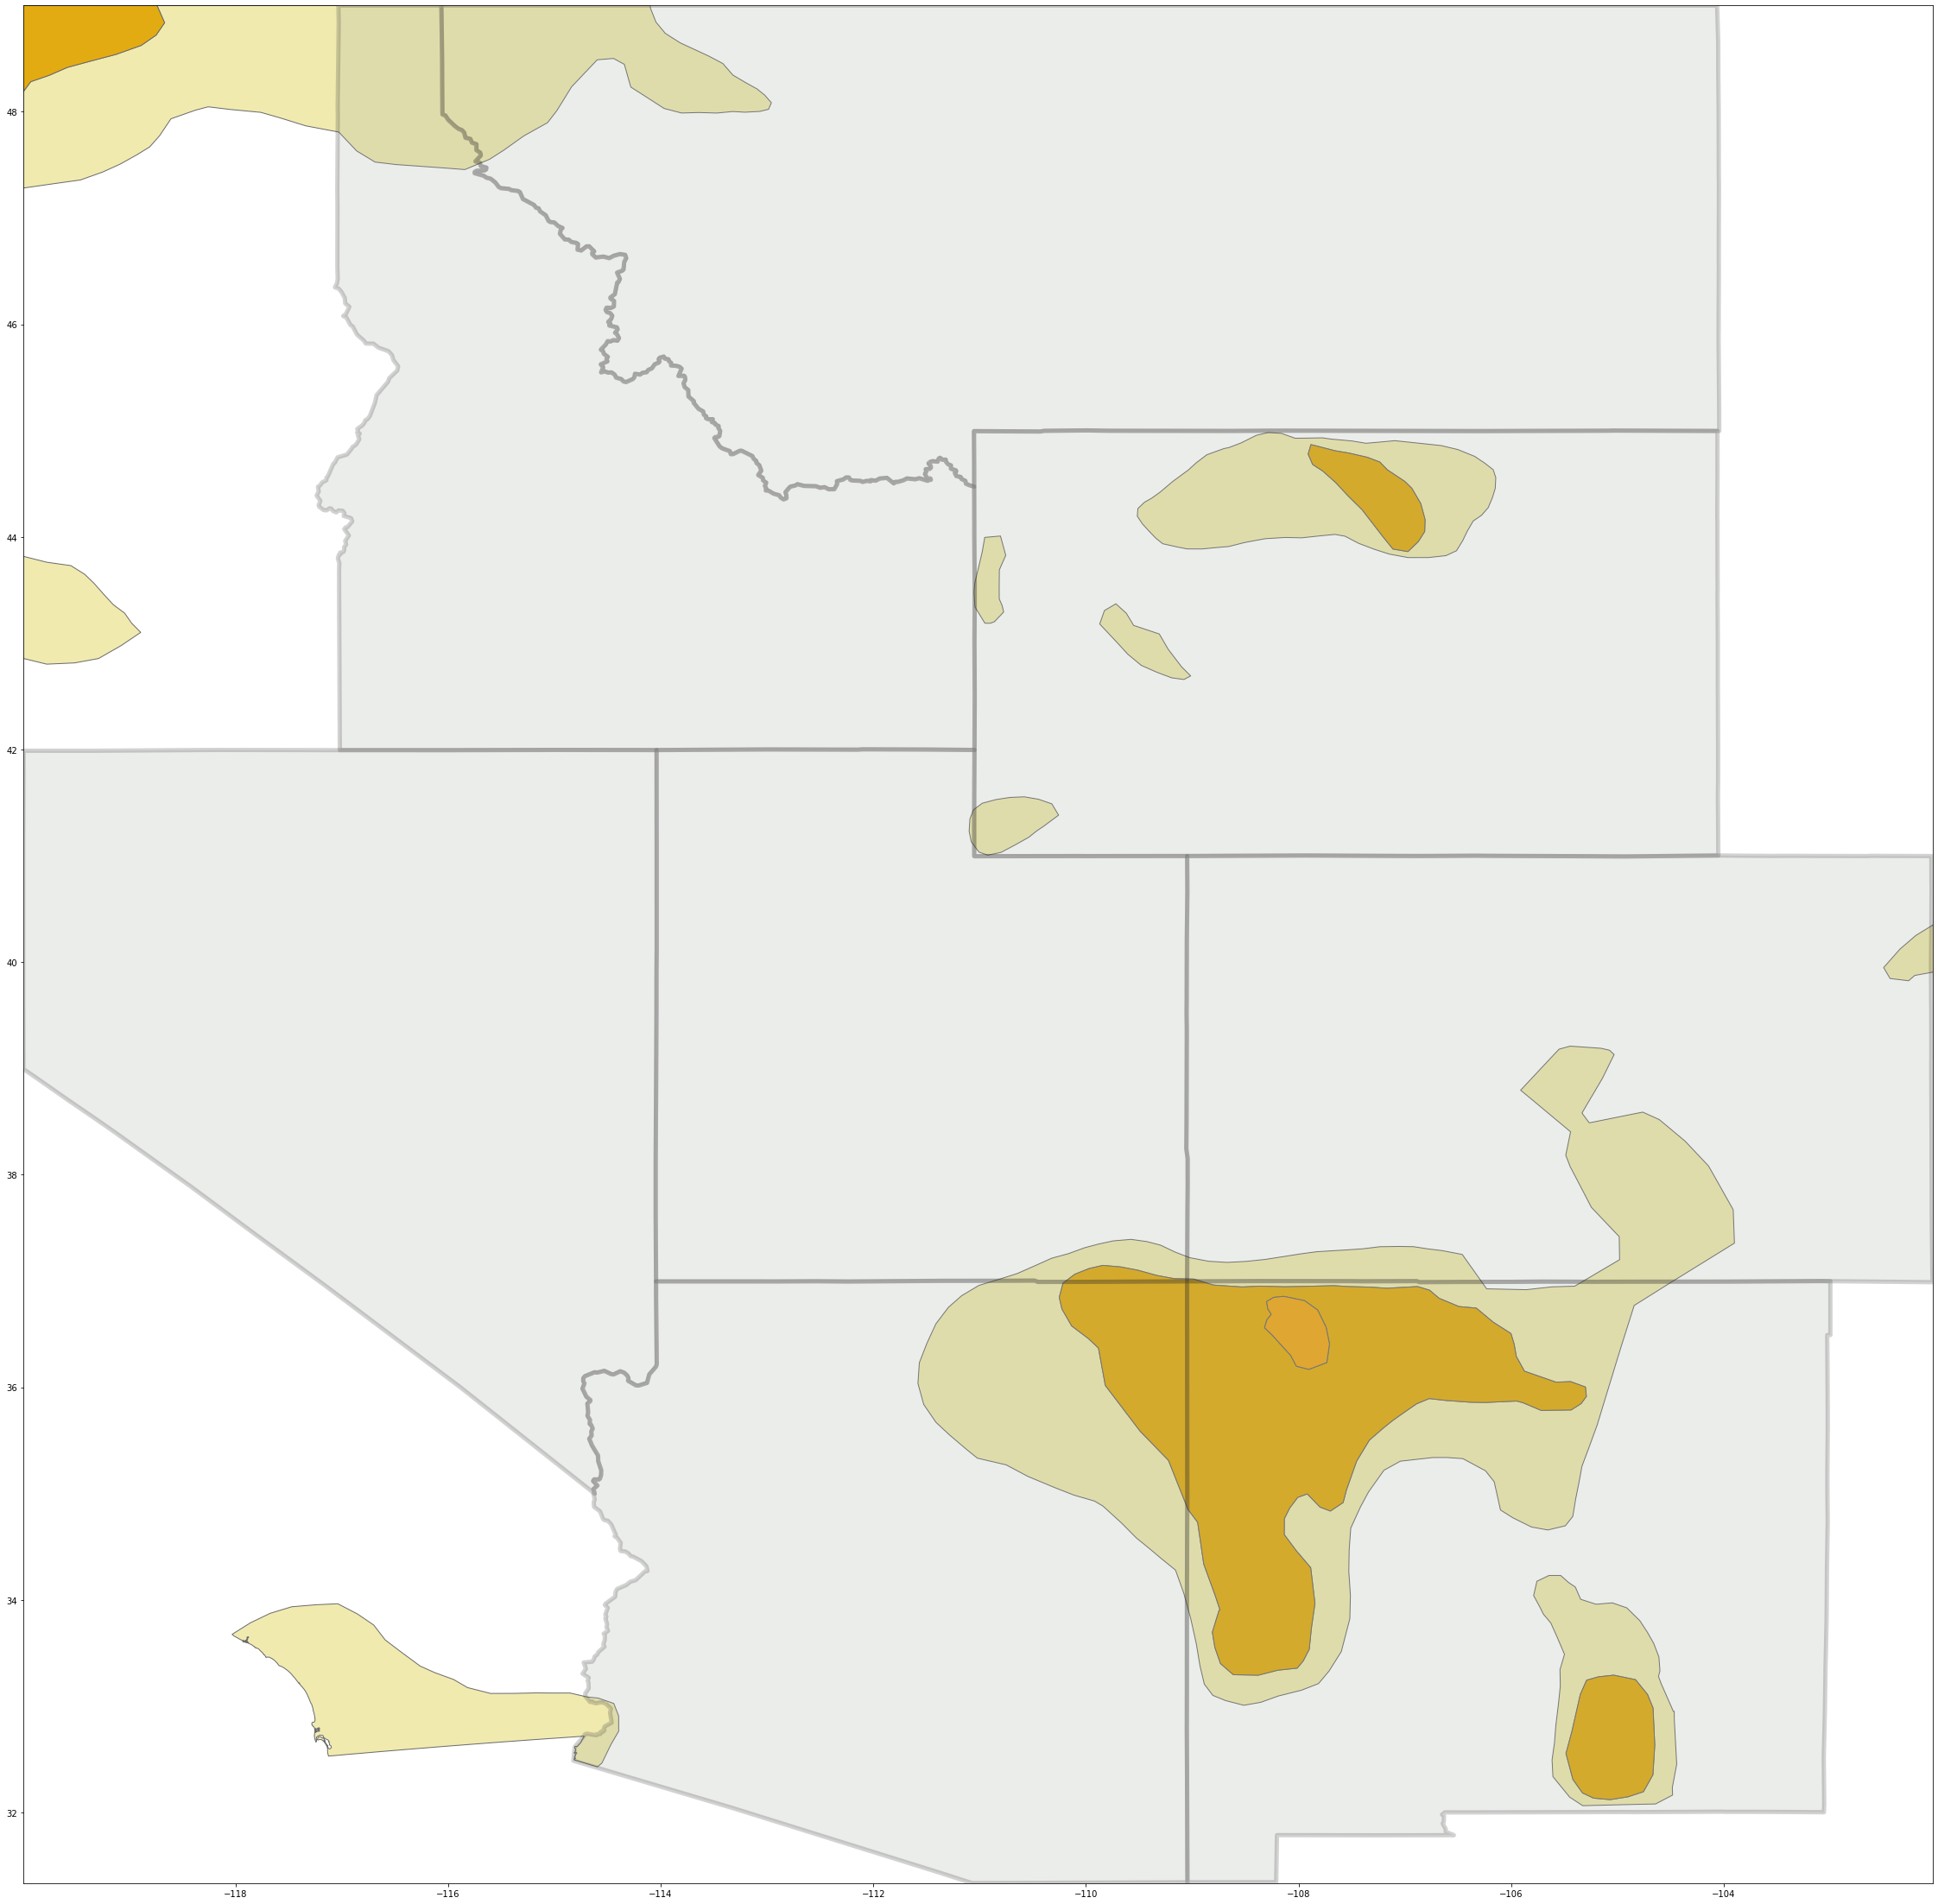

In [29]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_May.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_May.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_May.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_May.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_May.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for May 2019 Drought Levels </h3> 
<p> D2 Level drought is winding down in NM and is D1 and D0 are reducting throughout all four states.
It should be noted that it has taken close to ten months to see drought reduce to this point. With Summer around the corner, will we start to see an increase in drought occurances?</p> 

<h3> Drought Data for June, July and August 2019</h3> 

In [30]:
# filter for June Drought Lvls  
D0_Jun = Jun_Drought[Jun_Drought['DM']==0]
D1_Jun = Jun_Drought[Jun_Drought['DM']==1]
D2_Jun = Jun_Drought[Jun_Drought['DM']==2]
D3_Jun = Jun_Drought[Jun_Drought['DM']==3]
D4_Jun = Jun_Drought[Jun_Drought['DM']==4]
# Filter for July Drought Lvls 
D0_Jul = Jul_Drought[Jul_Drought['DM']==0]
D1_Jul = Jul_Drought[Jul_Drought['DM']==1]
D2_Jul = Jul_Drought[Jul_Drought['DM']==2]
D3_Jul = Jul_Drought[Jul_Drought['DM']==3]
D4_Jul = Jul_Drought[Jul_Drought['DM']==4]
# Filter for August Drought Lvls 
D0_Aug = Aug_Drought_19[Aug_Drought_19['DM']==0] 
D1_Aug = Aug_Drought_19[Aug_Drought_19['DM']==1]
D2_Aug = Aug_Drought_19[Aug_Drought_19['DM']==2]
D3_Aug = Aug_Drought_19[Aug_Drought_19['DM']==3]
D4_Aug = Aug_Drought_19[Aug_Drought_19['DM']==4]

In [31]:
D0_Clip_Jun = D0_Jun[D0_Jun.geometry.intersects(Region_Poly)]
D1_Clip_Jun = D1_Jun[D1_Jun.geometry.intersects(Region_Poly)]
D2_Clip_Jun = D2_Jun[D2_Jun.geometry.intersects(Region_Poly)]
D3_Clip_Jun = D3_Jun[D3_Jun.geometry.intersects(Region_Poly)]
D4_Clip_Jun = D4_Jun[D4_Jun.geometry.intersects(Region_Poly)]
# October Intersects 
D0_Clip_Jul = D0_Jul[D0_Jul.geometry.intersects(Region_Poly)]
D1_Clip_Jul = D1_Jul[D1_Jul.geometry.intersects(Region_Poly)]
D2_Clip_Jul = D2_Jul[D2_Jul.geometry.intersects(Region_Poly)]
D3_Clip_Jul = D3_Jul[D3_Jul.geometry.intersects(Region_Poly)]
D4_Clip_Jul = D4_Jul[D4_Jul.geometry.intersects(Region_Poly)]
# November Intersects 
D0_Clip_Aug = D0_Aug[D0_Aug.geometry.intersects(Region_Poly)]
D1_Clip_Aug = D1_Aug[D1_Aug.geometry.intersects(Region_Poly)]
D2_Clip_Aug = D2_Aug[D2_Aug.geometry.intersects(Region_Poly)]
D3_Clip_Aug = D3_Aug[D3_Aug.geometry.intersects(Region_Poly)]
D4_Clip_Aug = D4_Aug[D4_Aug.geometry.intersects(Region_Poly)]

<h3> Plotting June 2019 Drought Levels </h3>

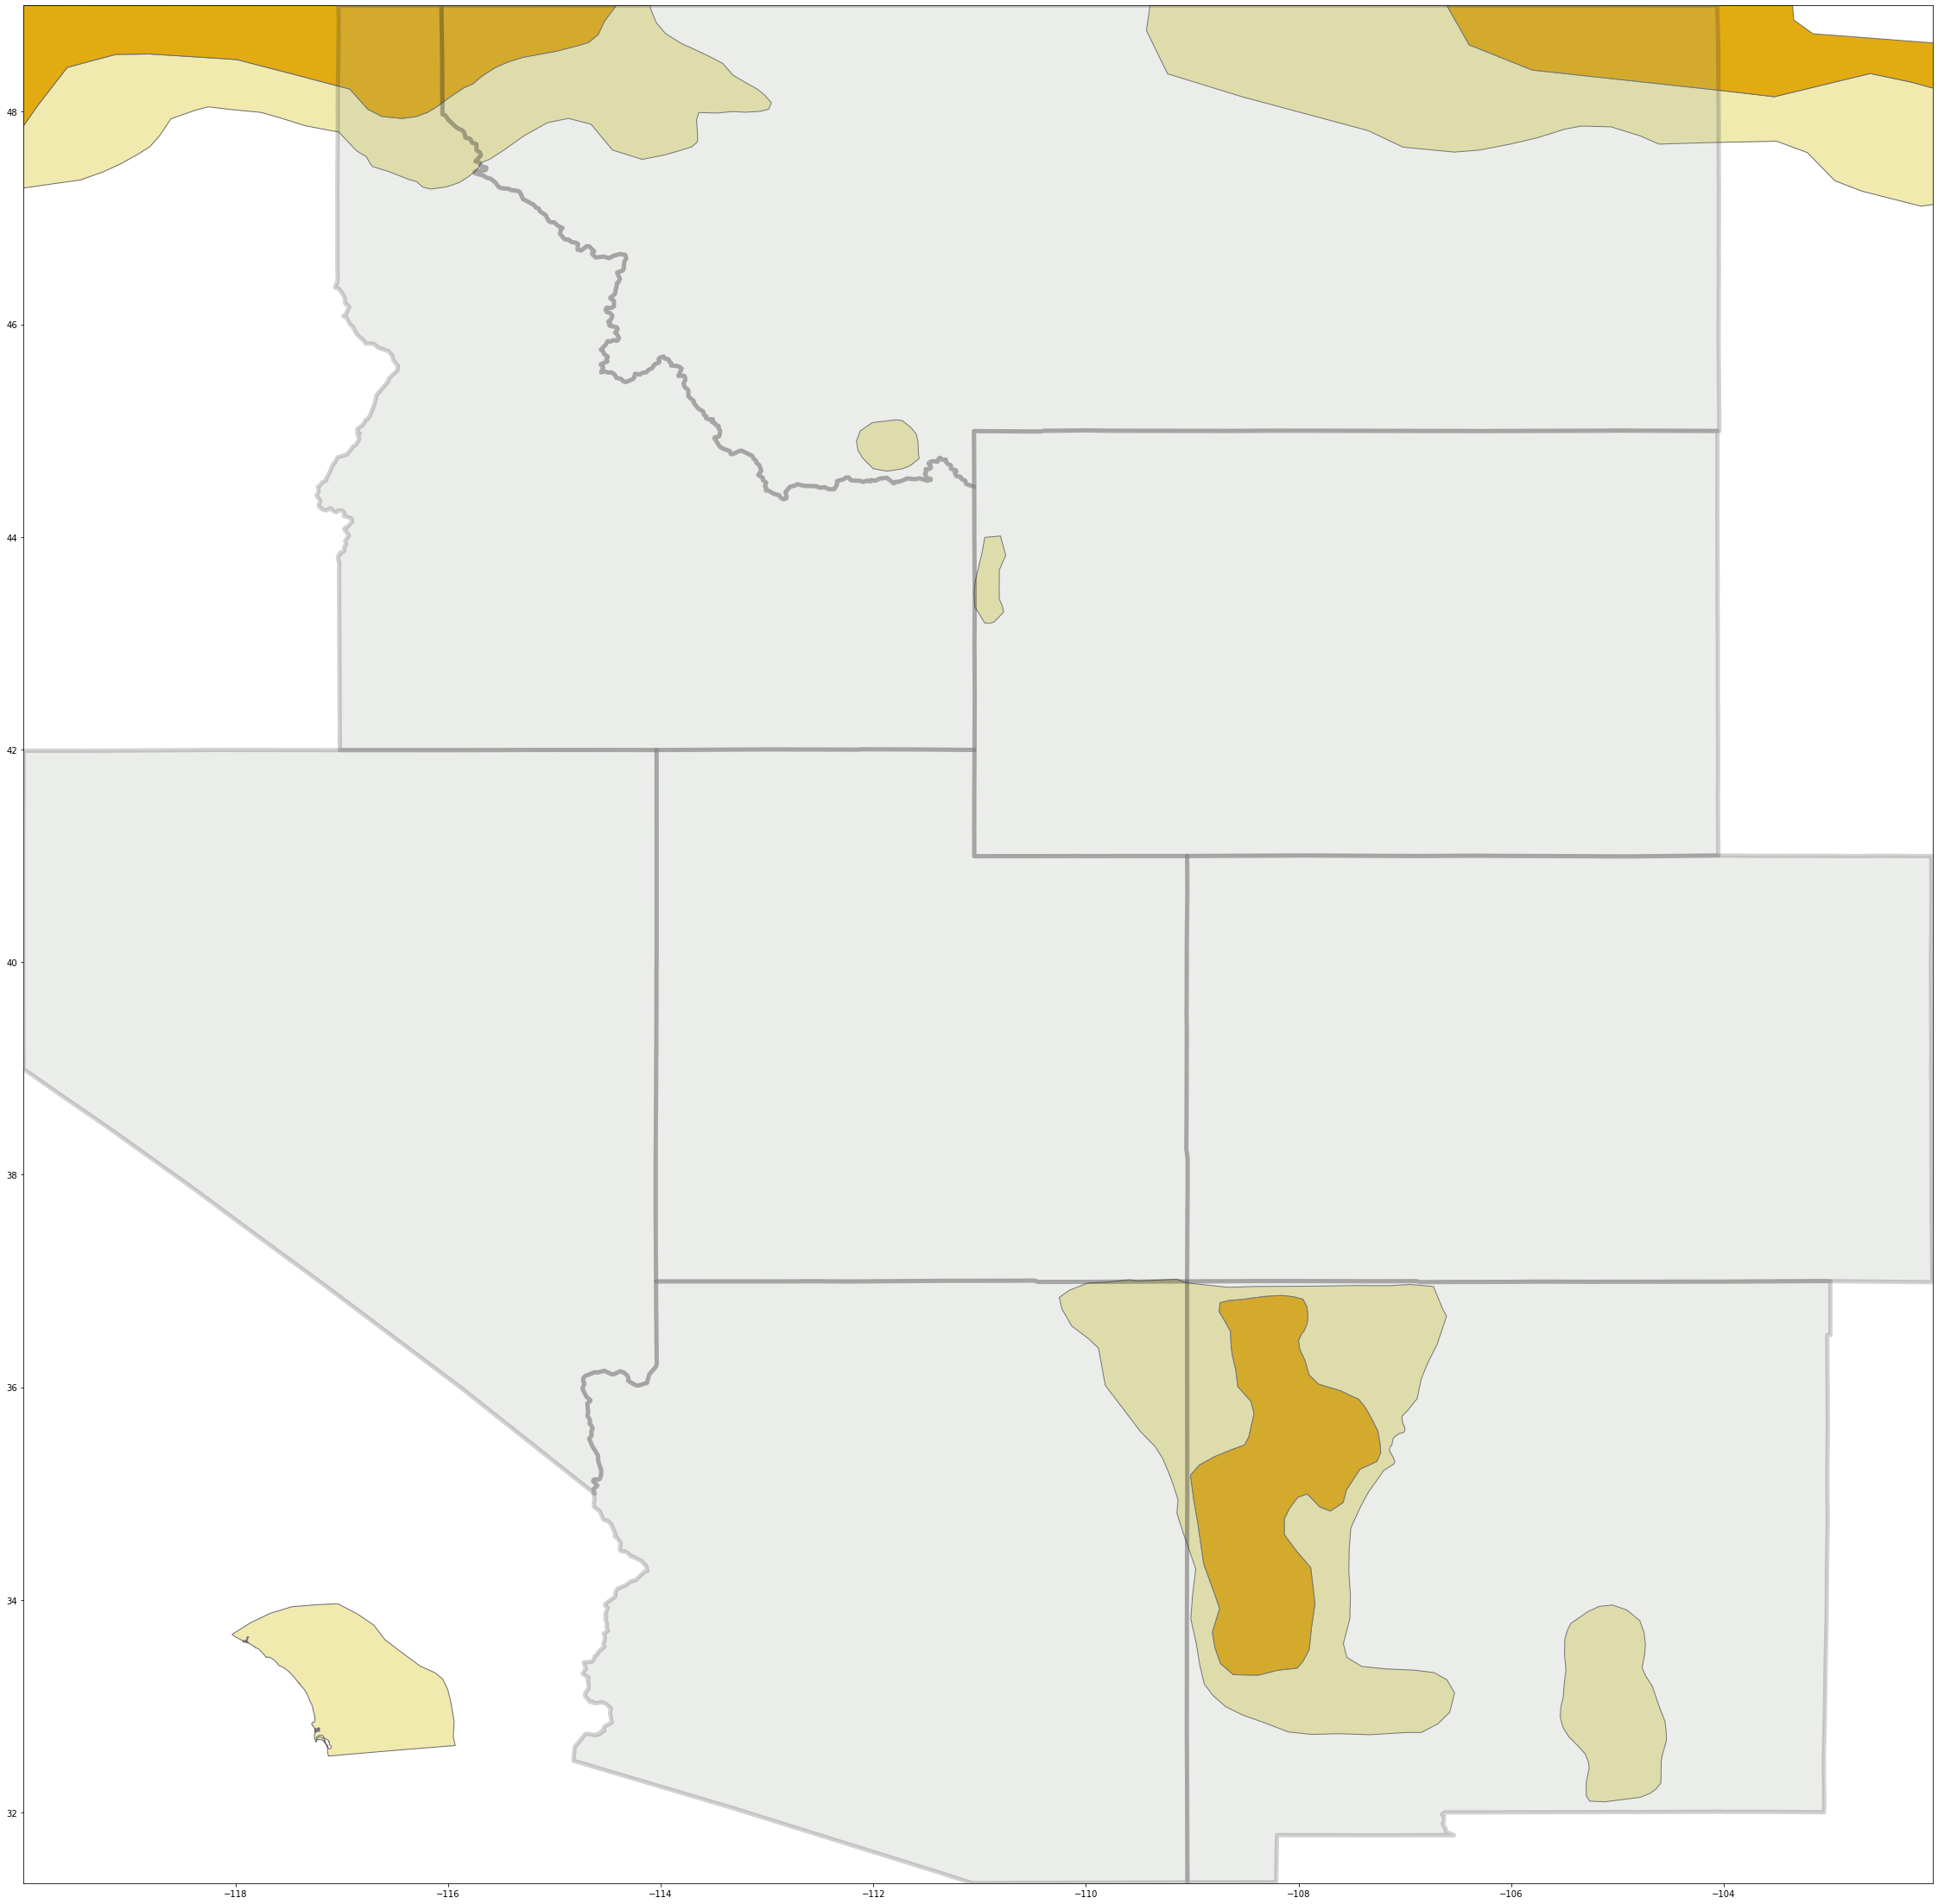

In [32]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Jun.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Jun.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Jun.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Jun.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Jun.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for June 2019 Drought Levels </h3> 
<p> From May to June we see that Colorado and Utah have no drought or abnormal dryness. Arizona  is seeing some abnormal dryness and New Mexico is seeing a largly reduced D1 level of drought in the Northwestern side of the state.</p> 

<h3> Plotting July 2019 Drought Levels</h3> 

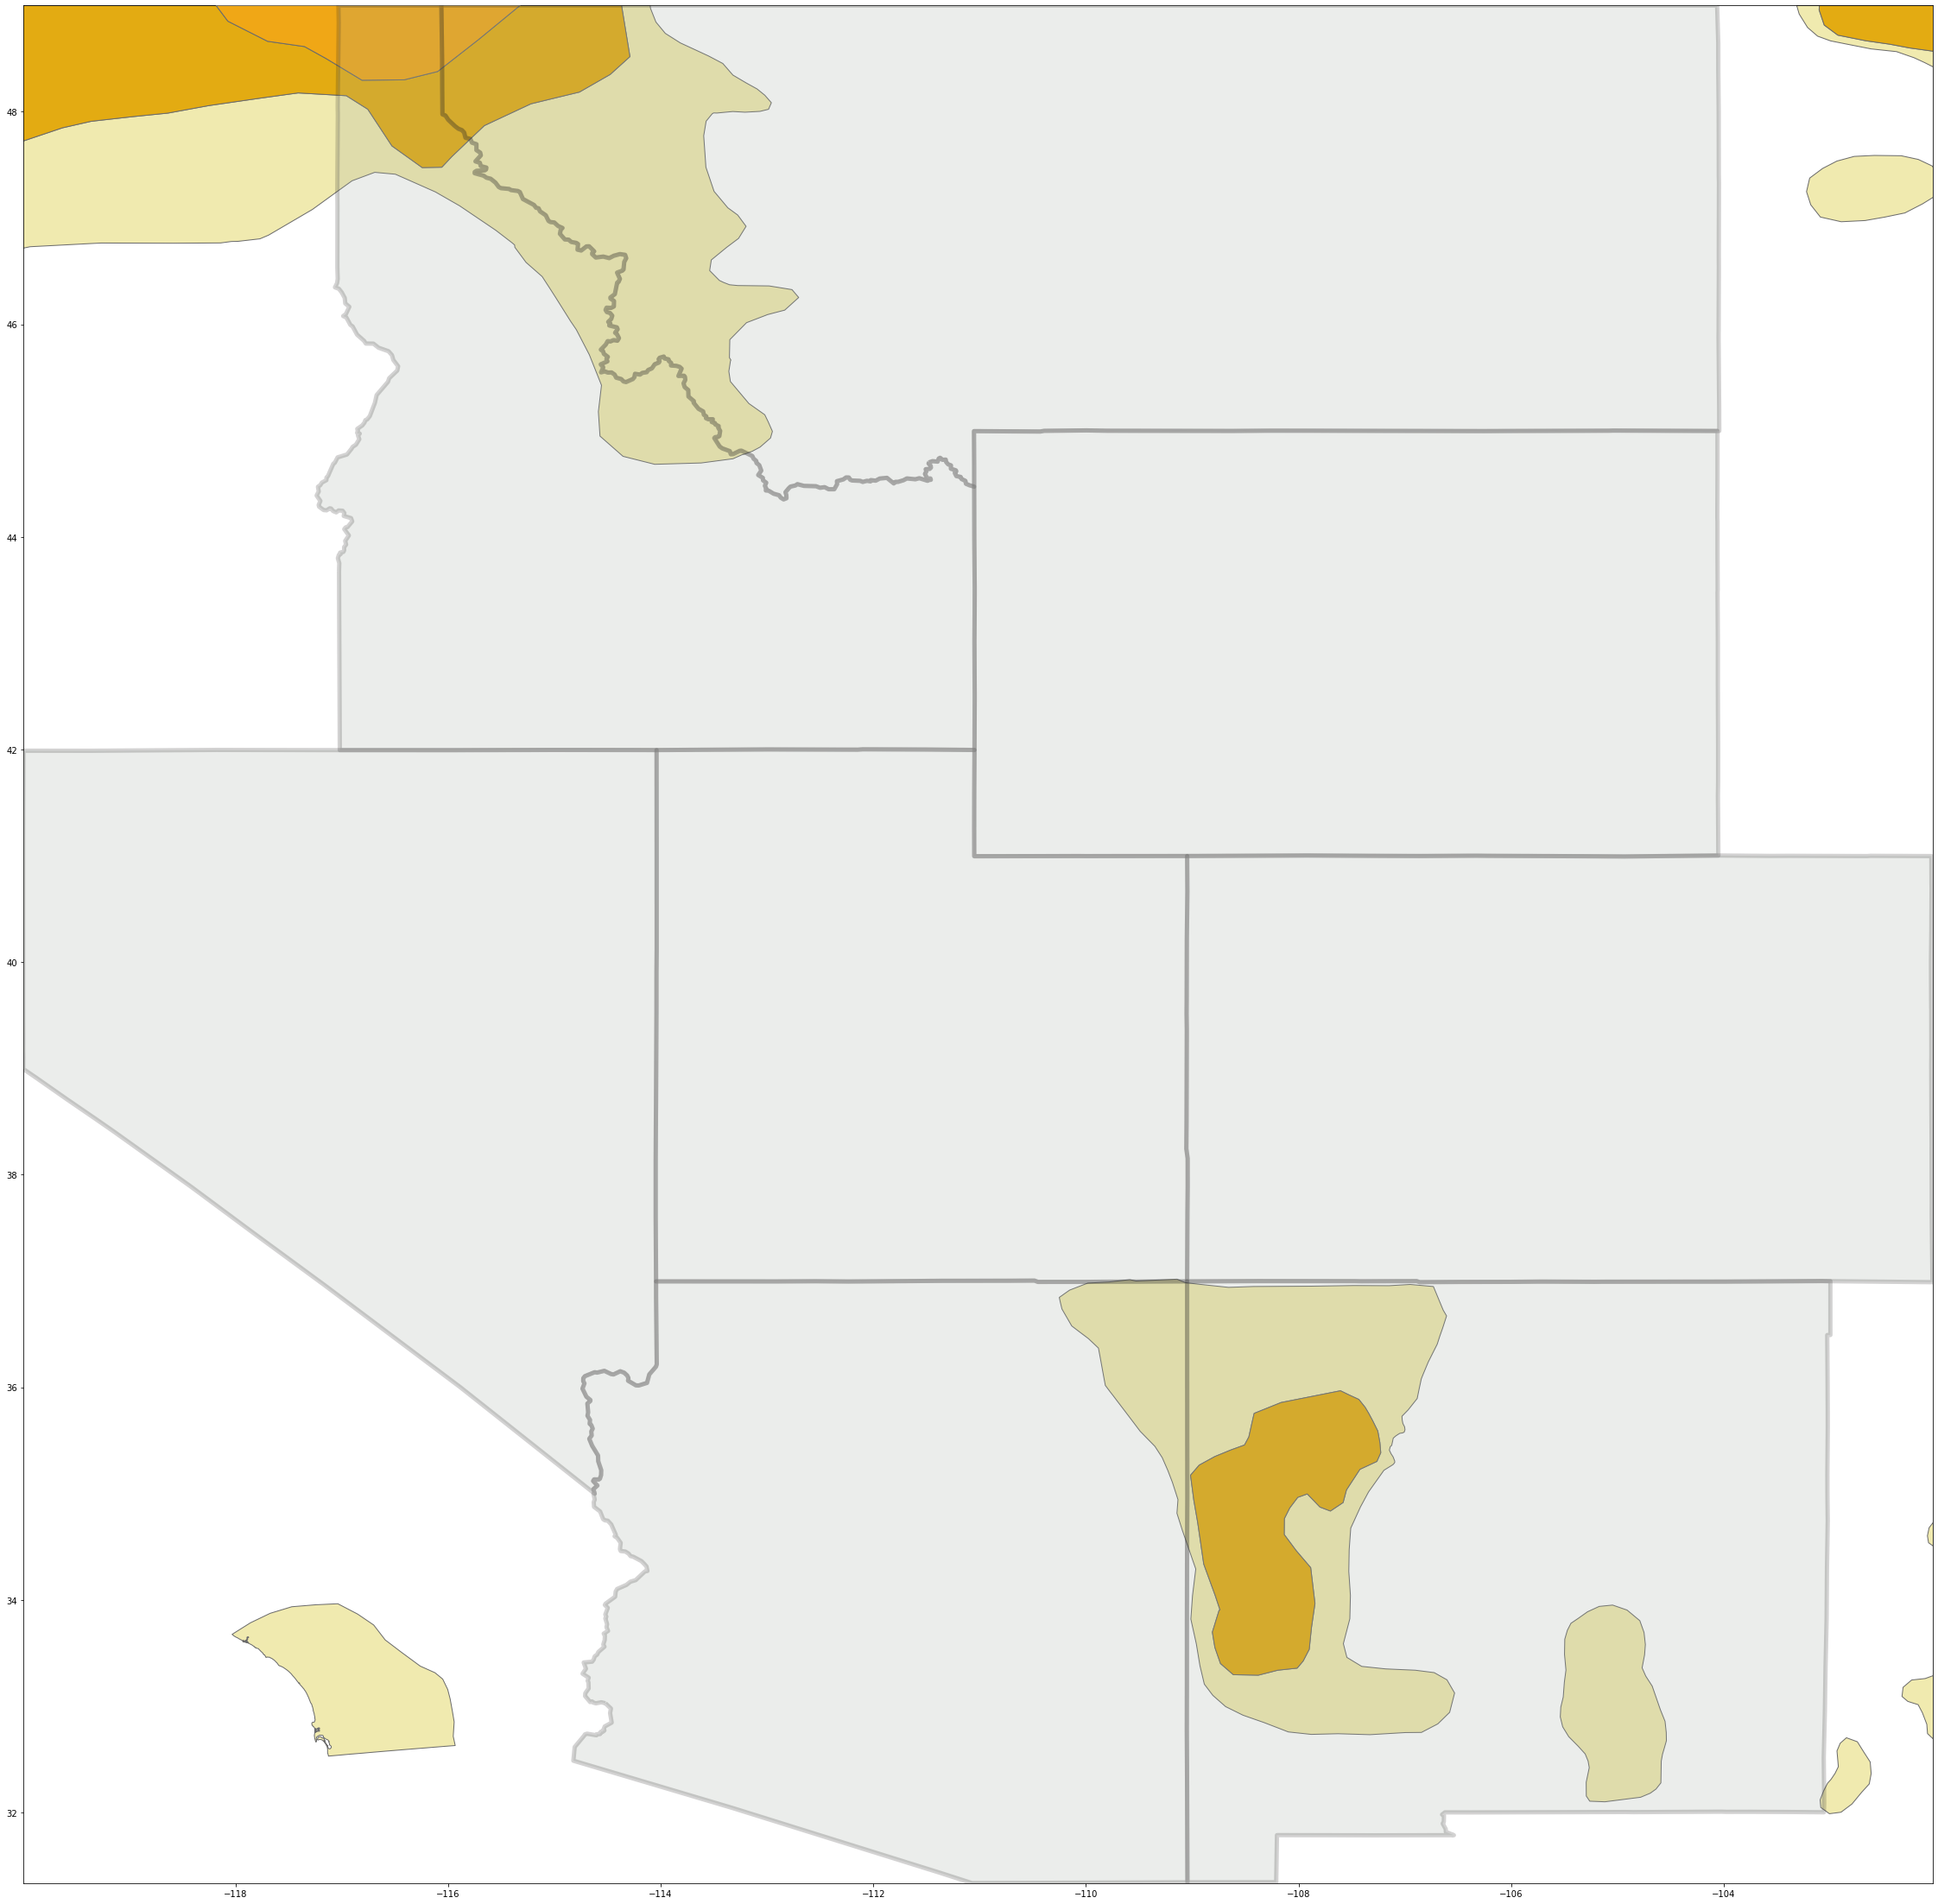

In [34]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Jul.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Jul.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Jul.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Jul.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Jul.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results for June 2019 Drought Levels </h3> 
<p> From June to July we see that Colorado and Utah  still have no drought or abnormal dryness. Arizona  is seeing some abnormal dryness but that has reduced since the pervious month. and New Mexico is seeing a reduced D1 level of drought in the western side of the state. However the southeastern side of the state is starting to see some abnormal dryness. </p> 

<h3> Plotting August 2019 Drought Levels </h3>

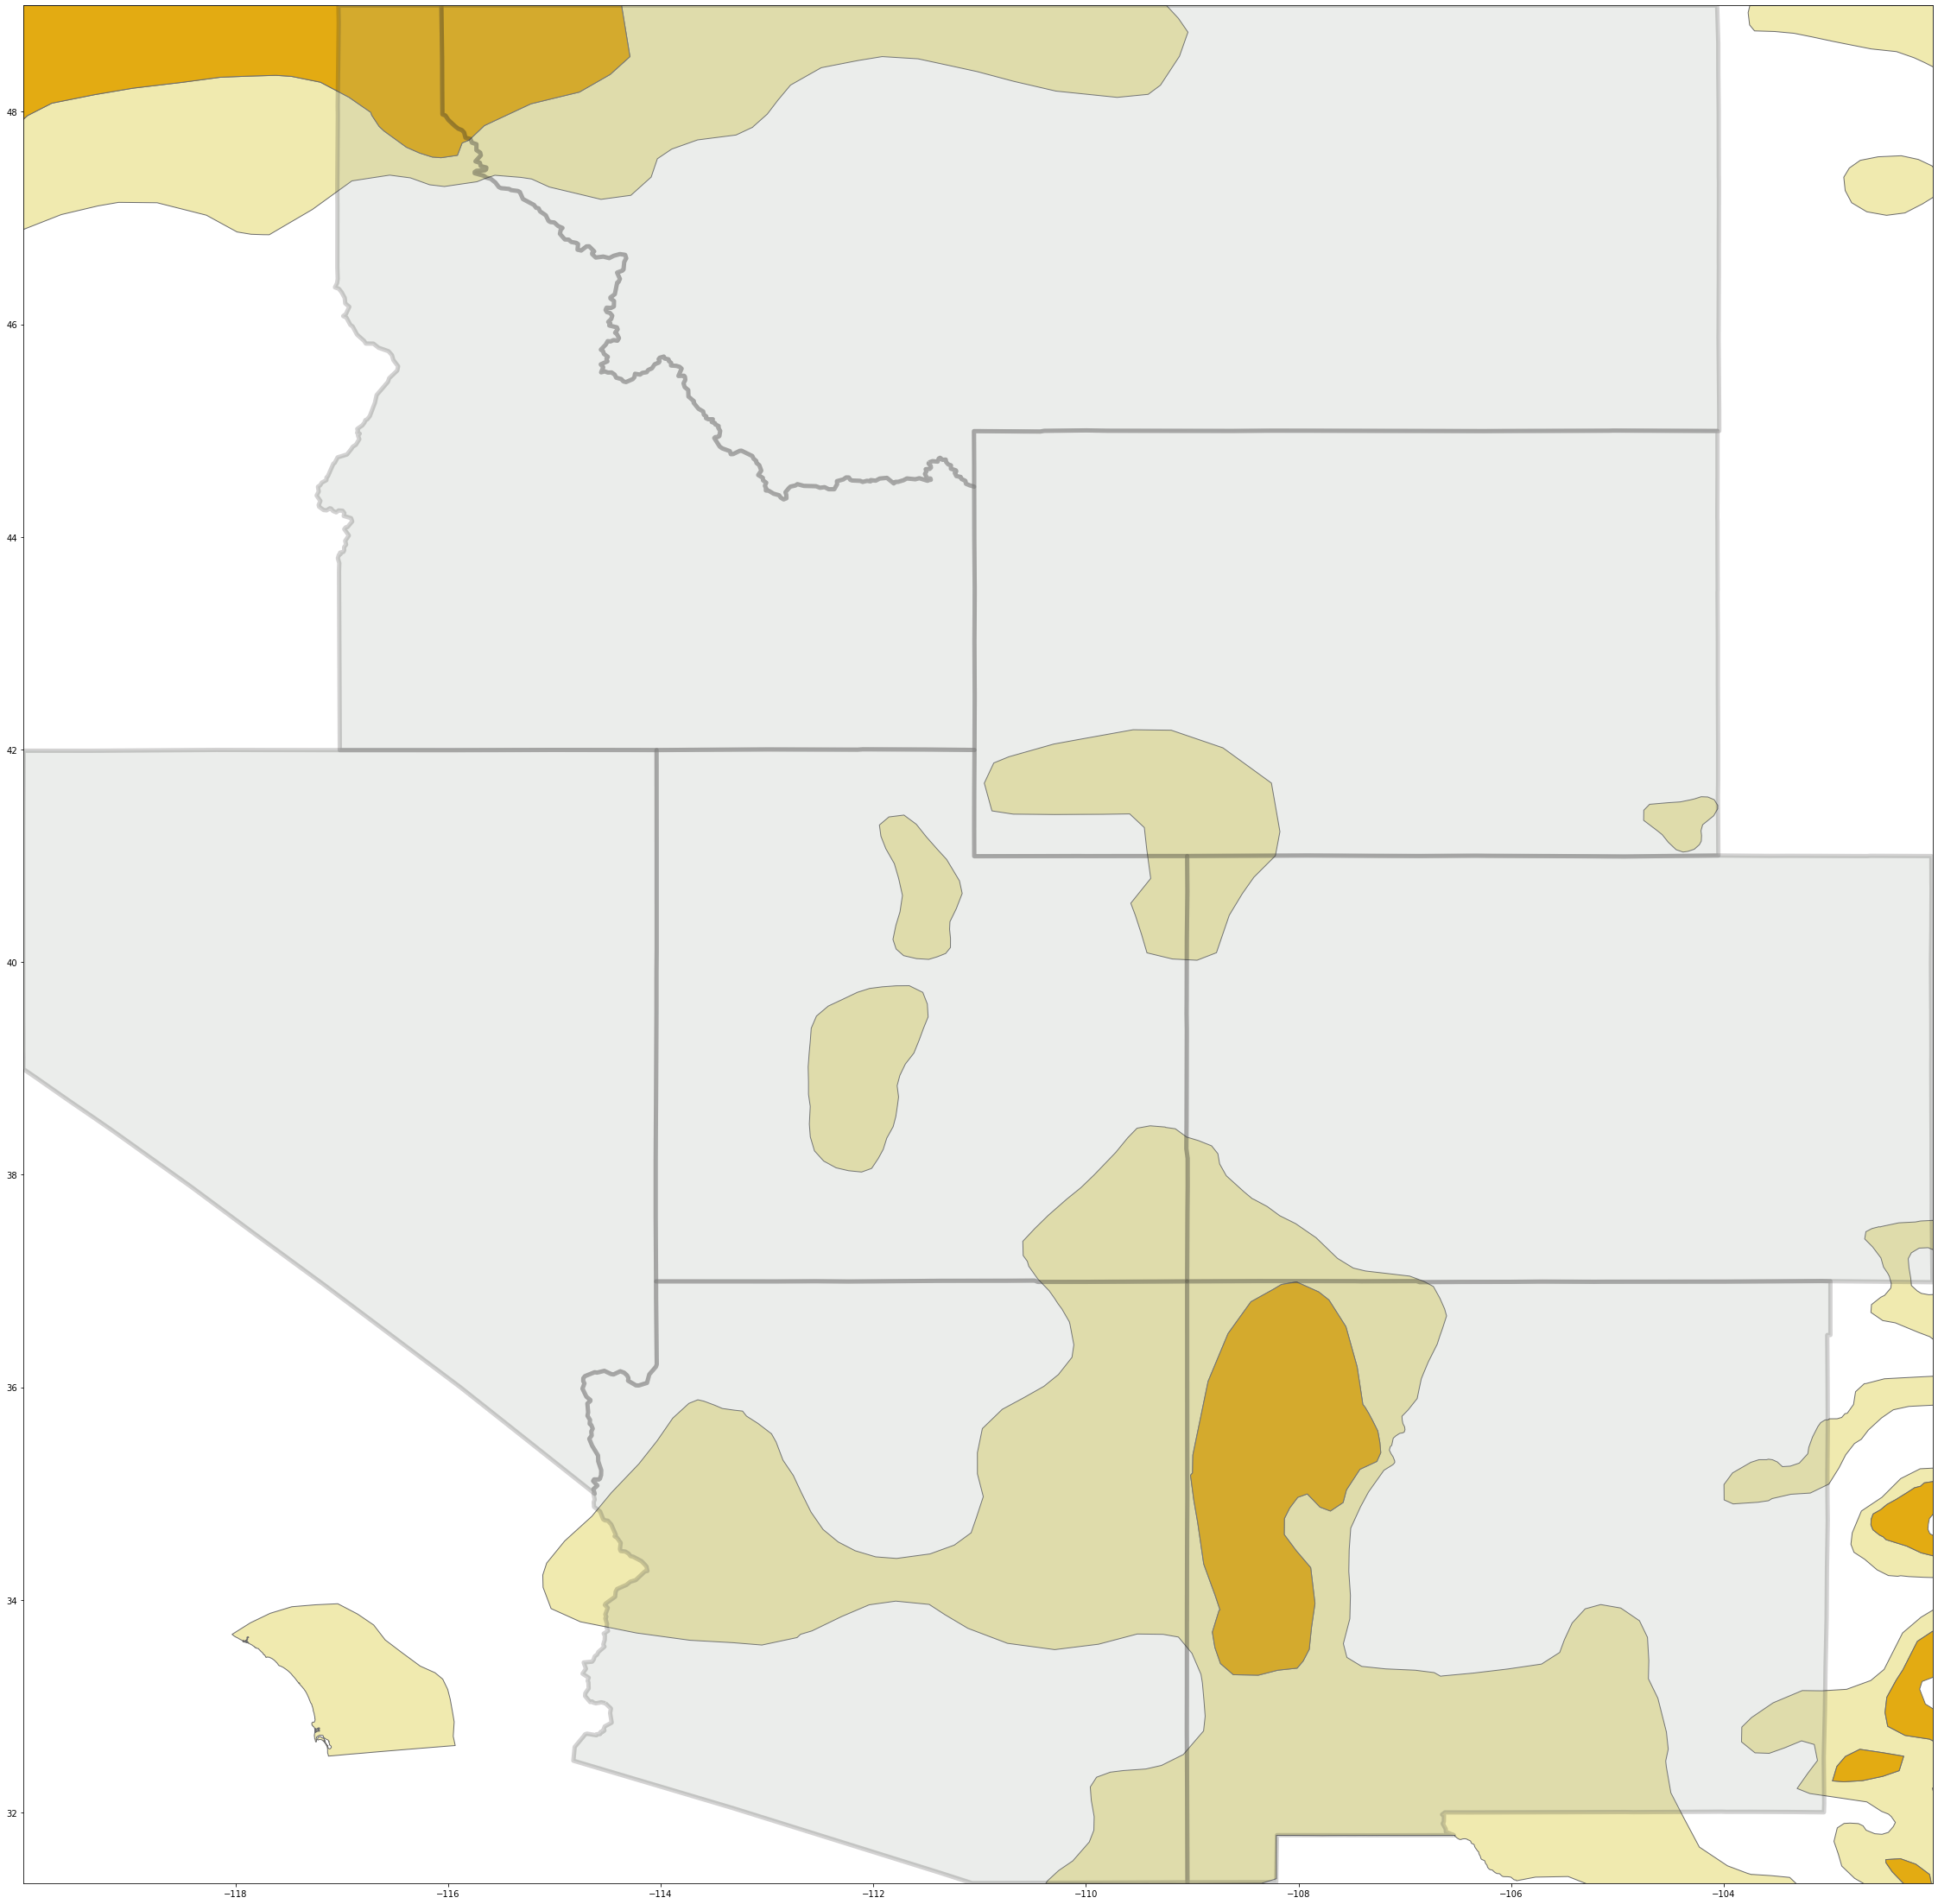

In [35]:
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Poly_color = '#4c8fc7'
Edge_Line = '#6b6b6b'
Region.plot(ax=ax, edgecolor = '#242222', linewidth=5, color=base_color,zorder=6, alpha=0.2);
D0_Clip_Aug.plot(ax=ax, color='#f0eaaf', edgecolor = Edge_Line, zorder=1);
D1_Clip_Aug.plot(ax=ax, color='#e3ab12', edgecolor = Edge_Line, zorder=2);
D2_Clip_Aug.plot(ax=ax, color='#f0a716', edgecolor = Edge_Line, zorder=3);
D3_Clip_Aug.plot(ax=ax, color='#e83d13', edgecolor = Edge_Line, zorder=4);
D4_Clip_Aug.plot(ax=ax, color='#a1381f', edgecolor = Edge_Line, zorder=5);
minx, miny, maxx, maxy = Region.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy);

<h3> Results of August 2019 Drought Levels </h3>
<p>  This month is starting to see an increase in abnormal dryness In all four of our states, but largely AZ and NM. This could indicate that we are headed back into a drought season. In NM, That D1 Drought level has increased again along the Northwestern portion of the state, which may affect crops in that region.</p> 

<h3> Overall Results, Limitations and Conclusion </h3> 
<h4> Overall Results</h4> 
<p> Throughout the year from August 2018 to August 2019 The drought levels have flucated from month to month, with various drought levels growing and shifting in this region. The peak of the drought season was seen from August 2018 to March 2019. </p>
  <p>  From March until July we saw a decline in drought levels that may have been impacted by perciptation and snow melt, however without that data to collobrate we have no real way of knowing. In August of 2019 we saw an increase in Abnormal dryness starting to occur throughout all four states and this may suggest another drought season is about to occur. However, without continued data we don't know if this is accurate. </p>
   <p> The drought trends throughout these four states presents us with a understanding of how drought has occured in this area for the past year. Given more time, I would have been able to add more data to get a better sense of if each of the 4 levels of drought affected crops and socioeconomic aspects. However, based on this research here we are able to understand that large areas of each of these four states saw some level of drought and therefore would have felt some impact. Whether that was from crop loss due to drought of water shortages based on severe drought. It is likely that there was some impact. </p> 
<h4> Limitations </h4>
<p> One of the biggest Limitations was having enough time to get more data that would have provided a stronger understanding of just how much drought impacts people. Looking at the above maps, you can see that drought is occuring and that in some places it is severe, however without understanding the population of a certian region or understanding what farms were impacted, its hard to answer the question of So What?</p> 
<p> Drought can be hard to quantify because it is such a slow moving event that  often people do not realize it is occuring.
    Adding additional data related to socioeconomic impacts, would help people connect how drought is directly impacting them and what changes they may need to make in their own lives in order to not feel the full extent of a server drought.</p> 
<h4> Conclusions </h4> 
<p> In conclusion, understanding drought levels and how it impacts the geography of a variety of states, should continue over larger periods of time to understand how climate change is impacting water avialability. </p> 
<p> Continue research should be conducted to understand how droughts change over time, how droughts affect crops and which ones are more prone to droughts vs which crops can withstand a drought for a period of time. There are lots of oppurtunities to continue to research and study droughts throughout this region. </p> 
